In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

# 1 Mean-Shift and K-Means
## 1.1 Mean-Shift
### (a) Implementation of Epanechnikov

In [4]:
def epanechnikov(x,m,w=1):
    u = (x - m)/w
    supp = abs(u) < 1
    res = 3/(4*w) * (1 - u**2)
    return res * supp

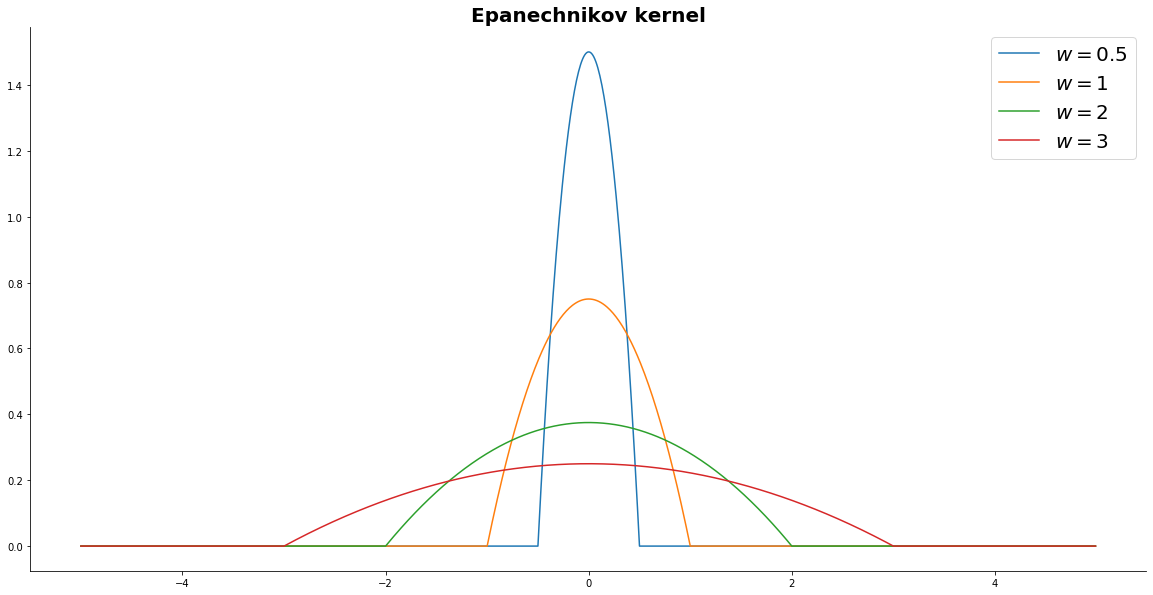

In [5]:
xseq = np.arange(-5,5,0.01)
plt.plot(xseq, epanechnikov(xseq, 0, 0.5), label=r"$w=0.5$")
plt.plot(xseq, epanechnikov(xseq, 0, 1), label=r"$w=1$")
plt.plot(xseq, epanechnikov(xseq, 0, 2), label=r"$w=2$")
plt.plot(xseq, epanechnikov(xseq, 0, 3), label=r"$w=3$")
plt.legend(fontsize=20)
plt.title("Epanechnikov kernel", fontsize=20, fontweight="bold")
sns.despine()

### (b) Mean-shift on a 1d data set

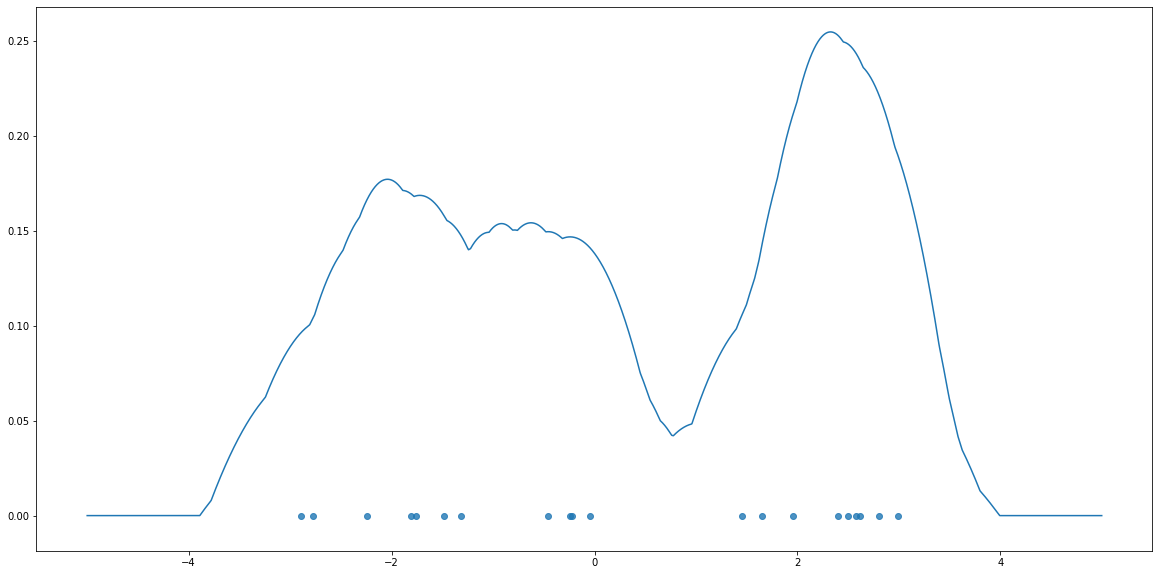

In [6]:
# data = np.concatenate([-2 + np.random.randn(10), 2 + np.random.randn(10)]) # TODO: Generate and save a nice data set
# np.save("meanshift1d.npy", data)
data = np.load("meanshift1d.npy")
xseq = np.arange(-5,5, 0.001)
def kde(x, obs, kernel):
    return sum([kernel(x, d) for d in obs]) / len(obs) # The list comp
plt.scatter(data, np.zeros(20), alpha=0.8)
plt.plot(xseq, kde(xseq, data, epanechnikov))

In [7]:
def mean_shift_step(Xt, obs):
    dist = (Xt[:,None] - obs[None])**2
    return np.array([np.mean(obs[dist[i] < 1]) for i in range(len(dist))])

In [8]:
# Run the mean-shift until there are no more updates, or max_steps are reached  
max_steps = 50
trajectories = [data, mean_shift_step(data, data)]
for t in range(max_steps):
    trajectories.append(mean_shift_step(trajectories[-1], data))
    if np.all(trajectories[-1] == trajectories[-2]):
        break
trajectories = np.stack(trajectories)

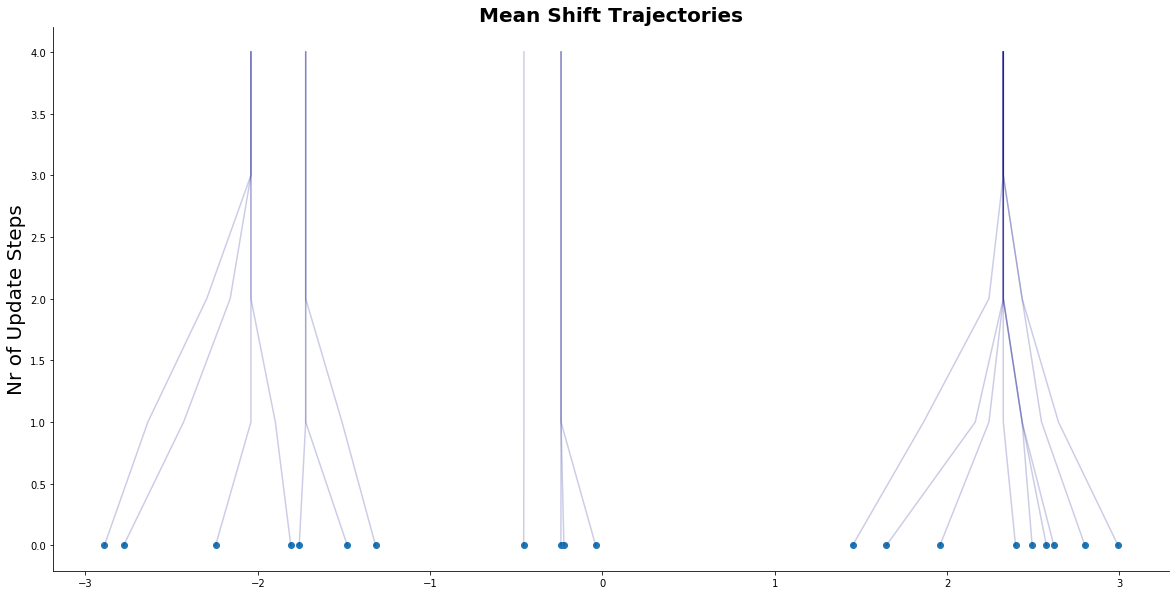

In [9]:
plt.scatter(data, np.zeros(len(data)))
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:,i], range(len(trajectories)), color="darkblue", alpha=0.2)
plt.ylabel("Nr of Update Steps", fontsize=20)
plt.title("Mean Shift Trajectories", fontsize=20, fontweight="bold")
sns.despine()

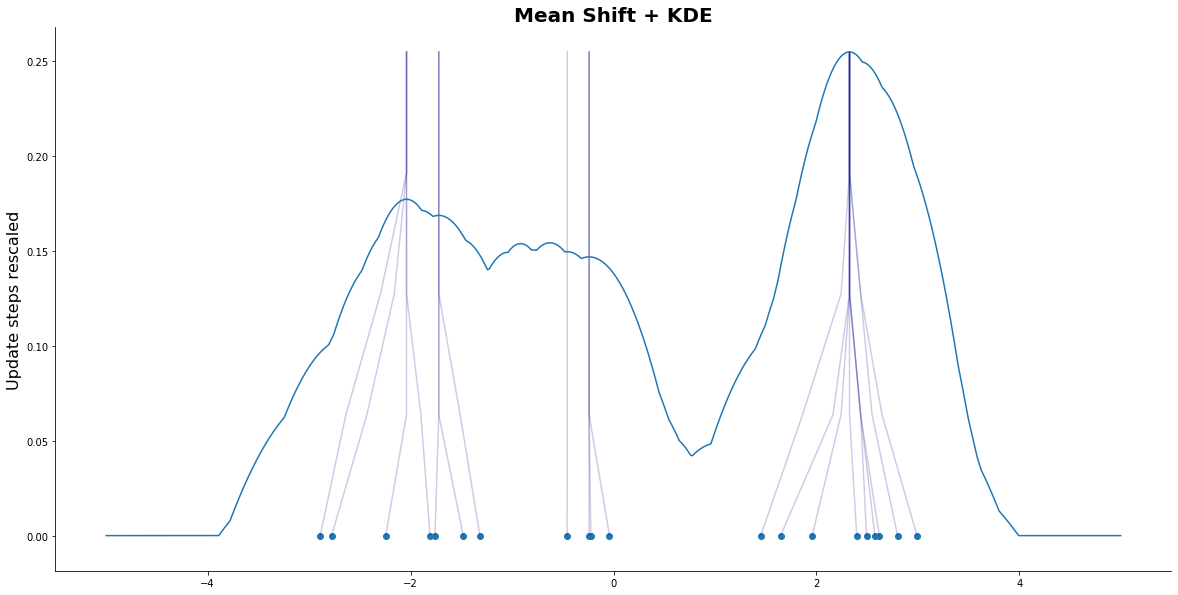

In [10]:
# How does this look like together with the KDE
plt.scatter(data, np.zeros(len(data)))
max_val = np.max(kde(xseq, data, epanechnikov))
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:,i], np.linspace(0,max_val,num=len(trajectories)), color="darkblue", alpha=0.2)
plt.plot(xseq, kde(xseq, data, epanechnikov))
plt.ylabel("Update steps rescaled", fontsize=16)
plt.title("Mean Shift + KDE", fontsize=20, fontweight="bold")
sns.despine()

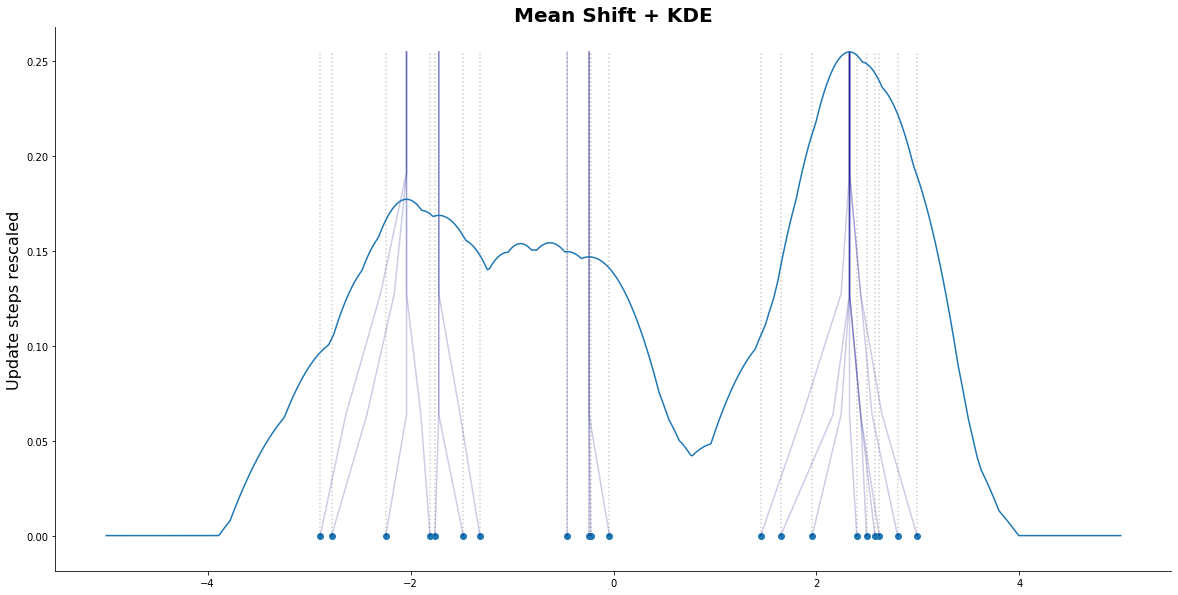

In [11]:
# How does this look like together with the KDE
plt.scatter(data, np.zeros(len(data)))
max_val = np.max(kde(xseq, data, epanechnikov))
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:,i], np.linspace(0,max_val,num=len(trajectories)), color="darkblue", alpha=0.2)
    plt.plot(trajectories[0,i] * np.ones(len(trajectories)), np.linspace(0,max_val,num=len(trajectories)),
             linestyle="dotted", color="black", alpha=0.2)
plt.plot(xseq, kde(xseq, data, epanechnikov))
plt.ylabel("Update steps rescaled", fontsize=16)
plt.title("Mean Shift + KDE", fontsize=20, fontweight="bold")
sns.despine()

In [12]:
# Sidenote: Cheap and dirty way to copy np.array()
A = np.arange(5)
print(A)
C = 1* A
C[3] = 7
print(C)
print(A)

[0 1 2 3 4]
[0 1 2 7 4]
[0 1 2 3 4]


## 1.2 K-Means

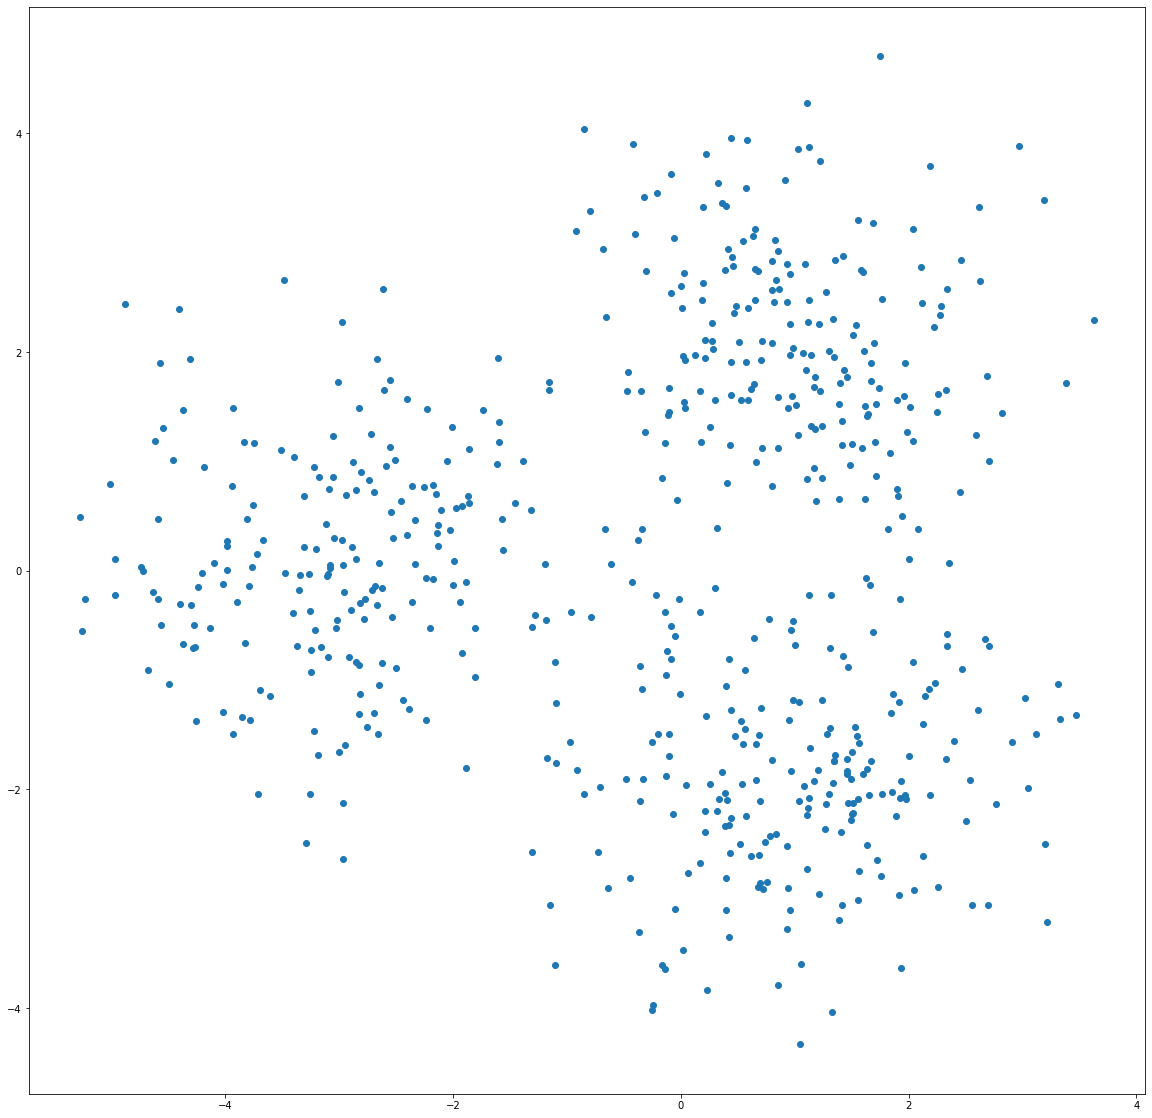

In [4]:
plt.rcParams["figure.figsize"] = (20,20)
N = 200
# data = np.hstack([np.array([-3,0]).reshape(2,-1) + np.random.randn(2,N),
#                   np.array([1, 2]).reshape(2,-1) + np.random.randn(2, N),
#                   np.array([1,-2]).reshape(2, -1) + np.random.randn(2, N)])
# np.save("kmeans2d.npy", data)
data = np.load("kmeans2d.npy")
plt.scatter(data[0,:], data[1,:])

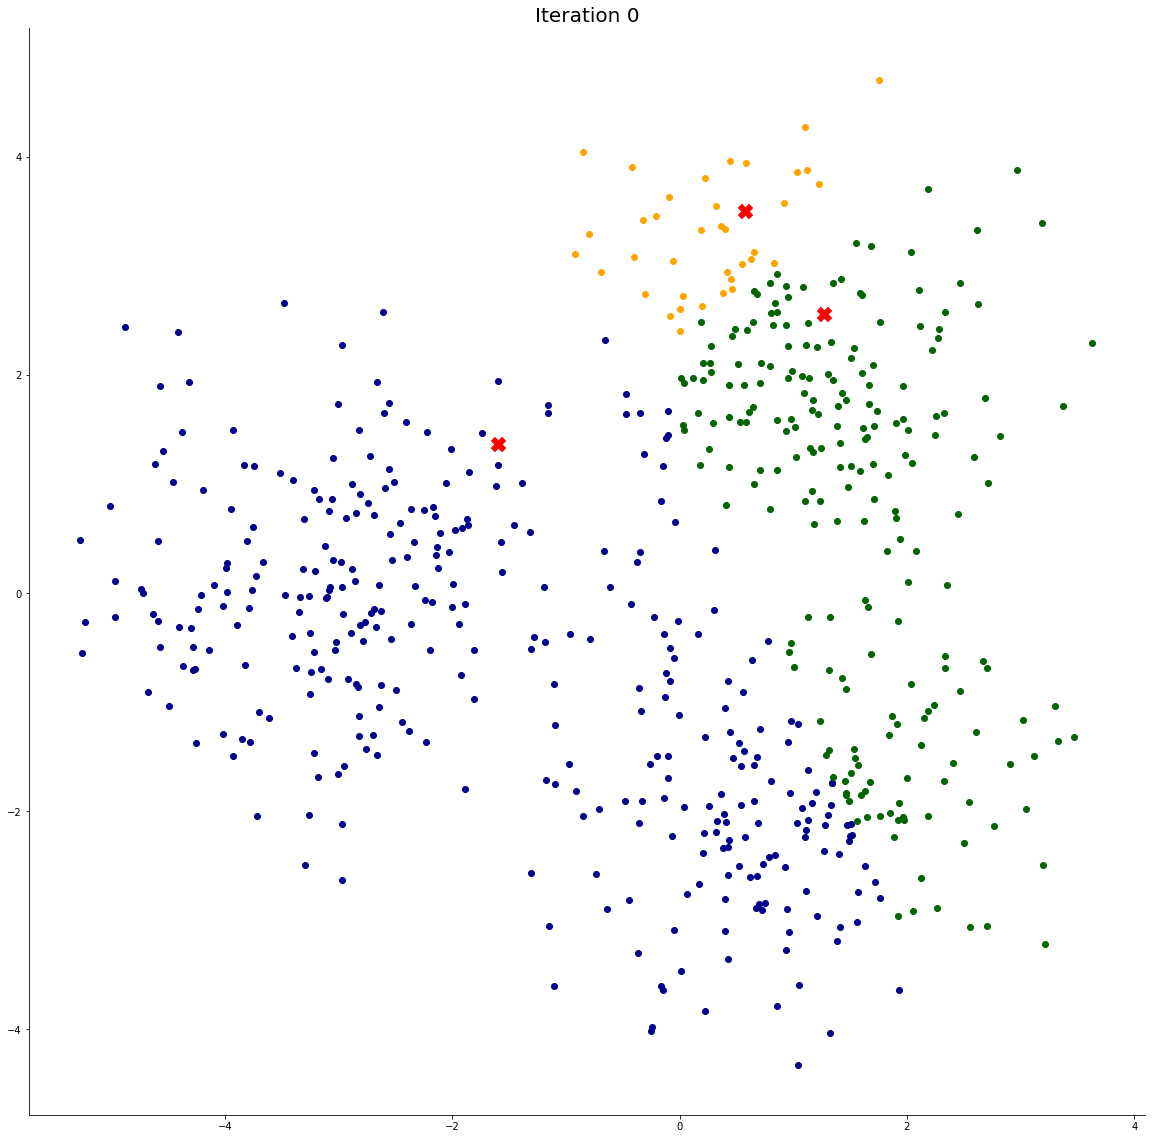

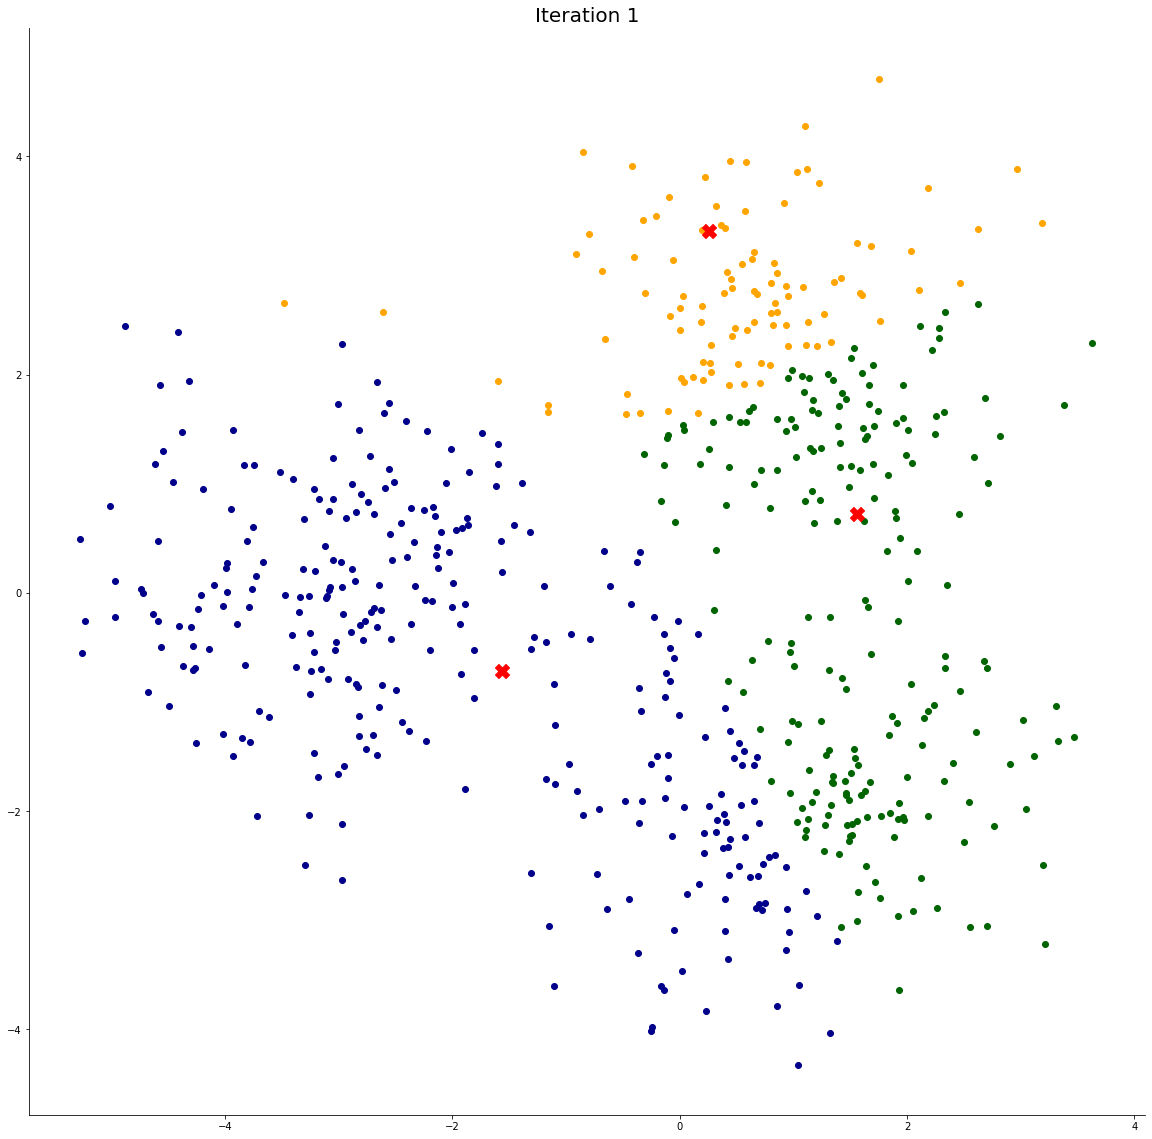

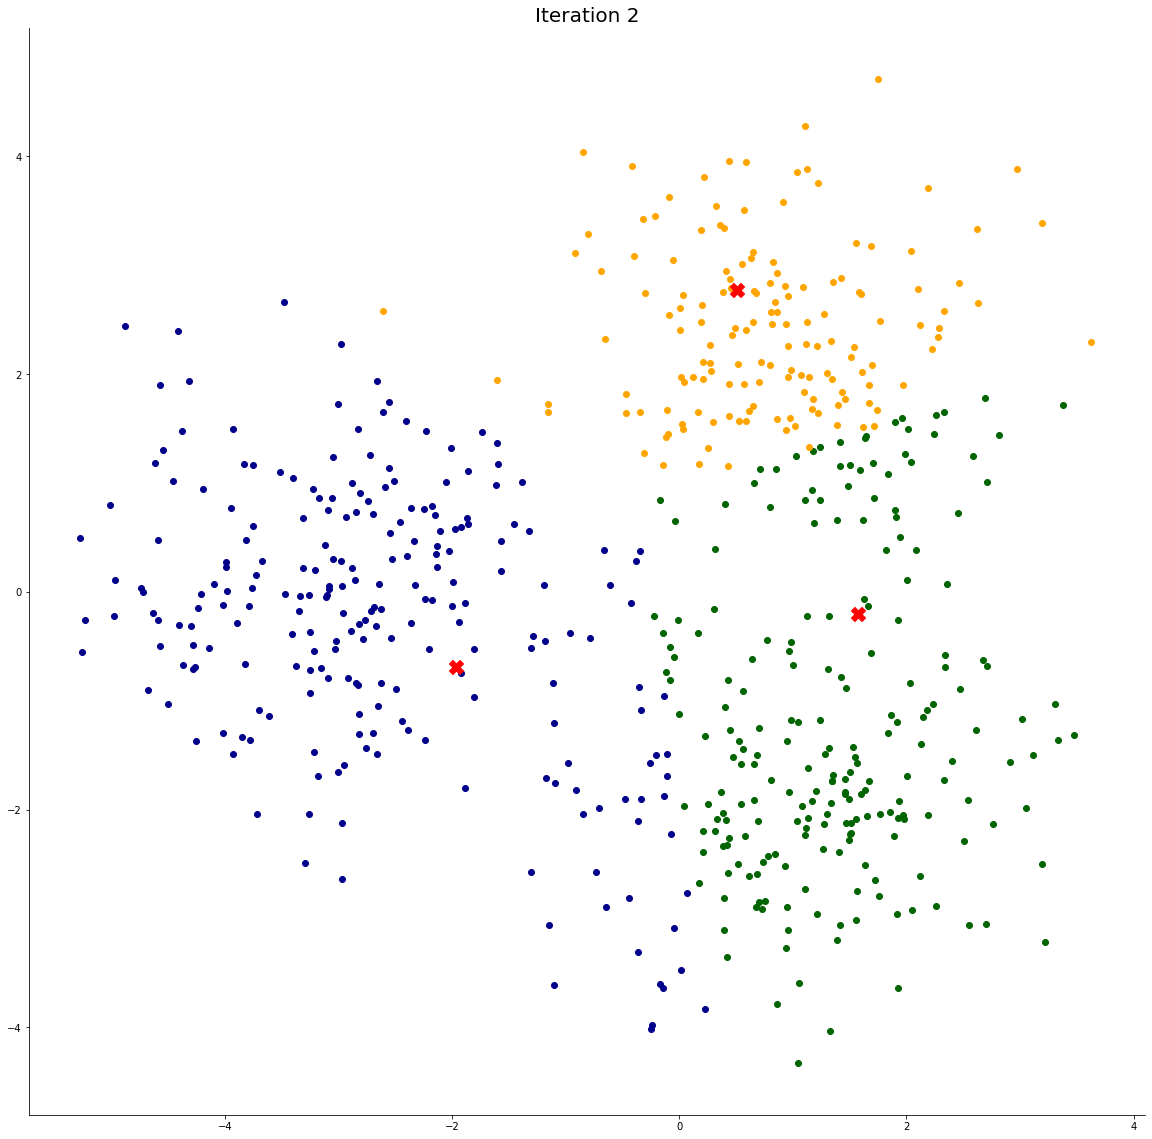

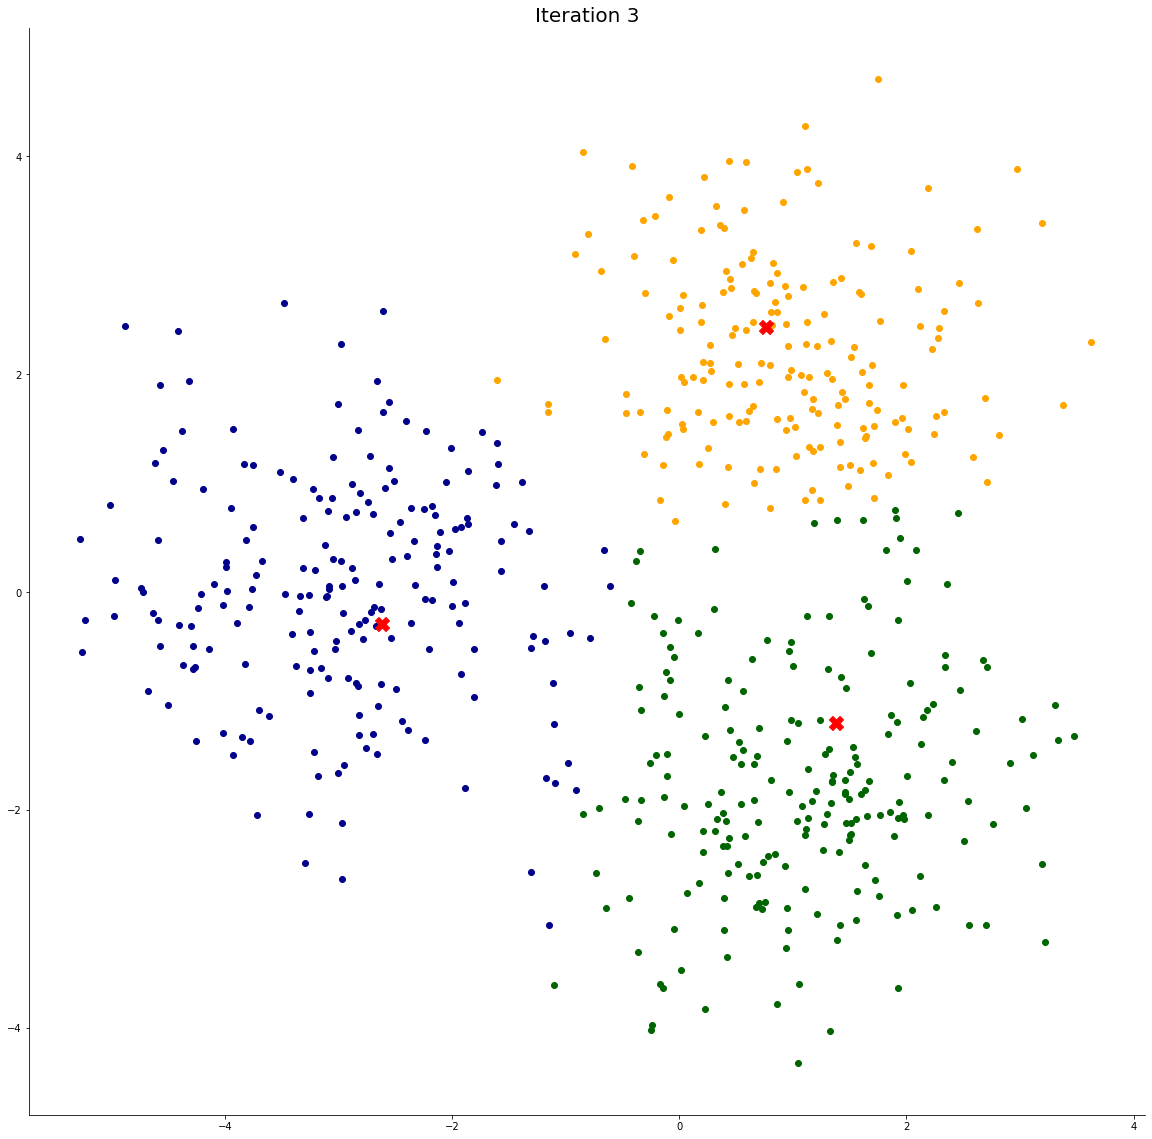

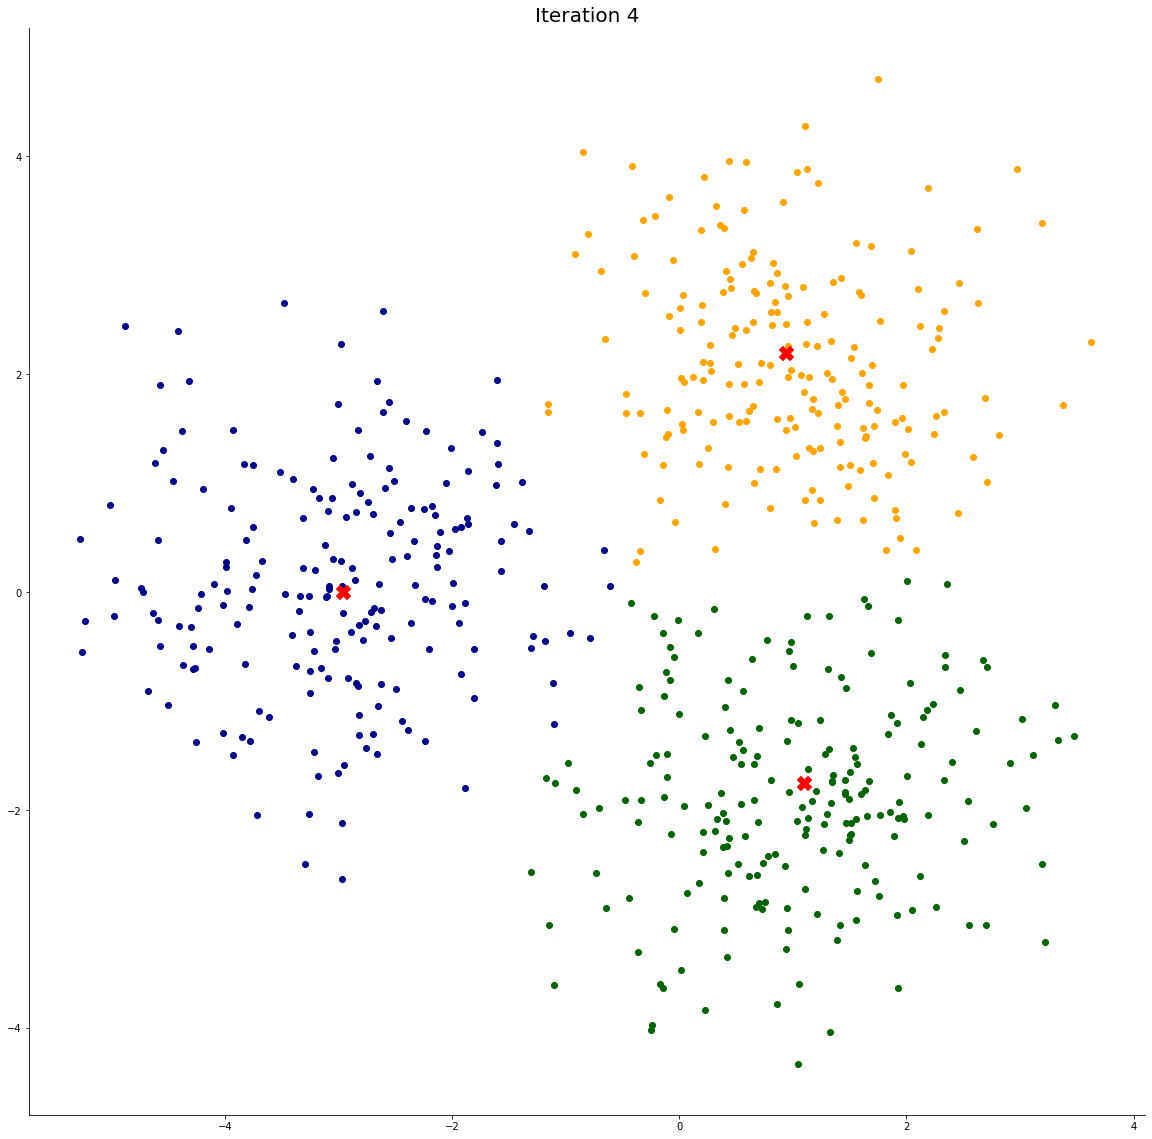

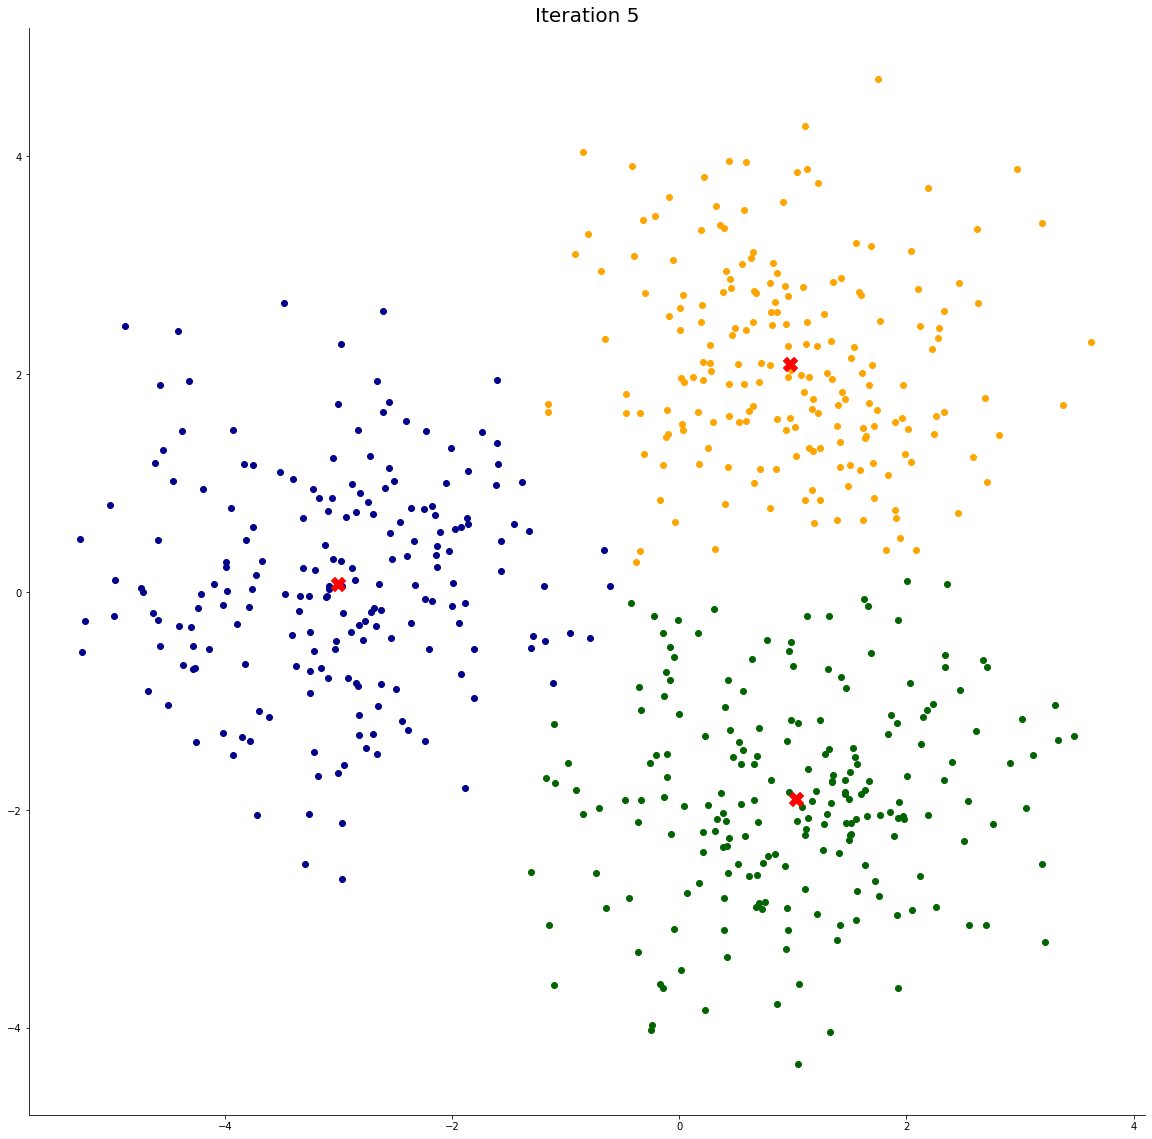

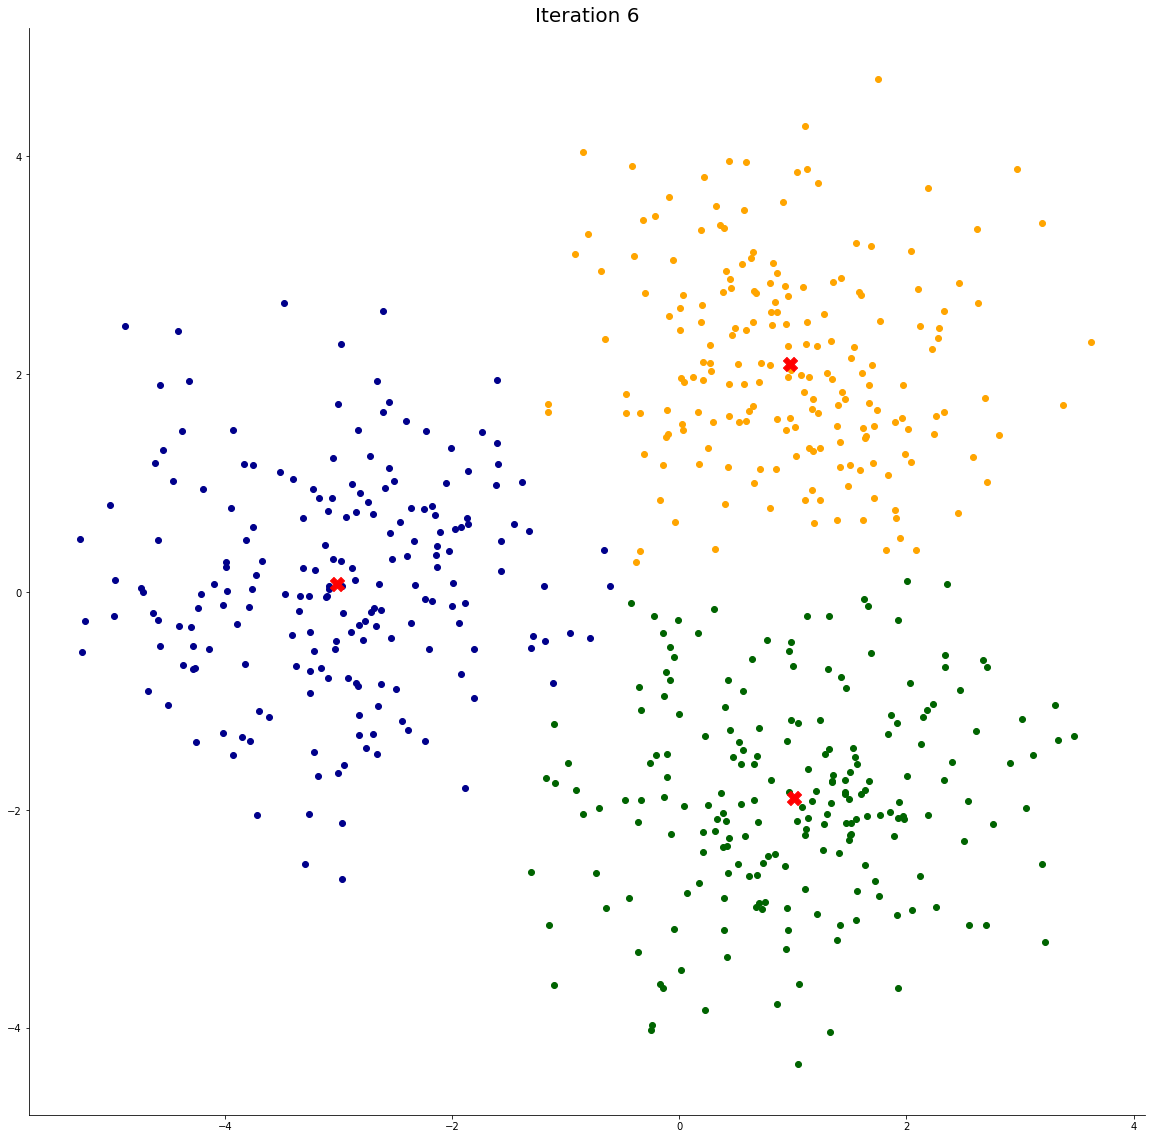

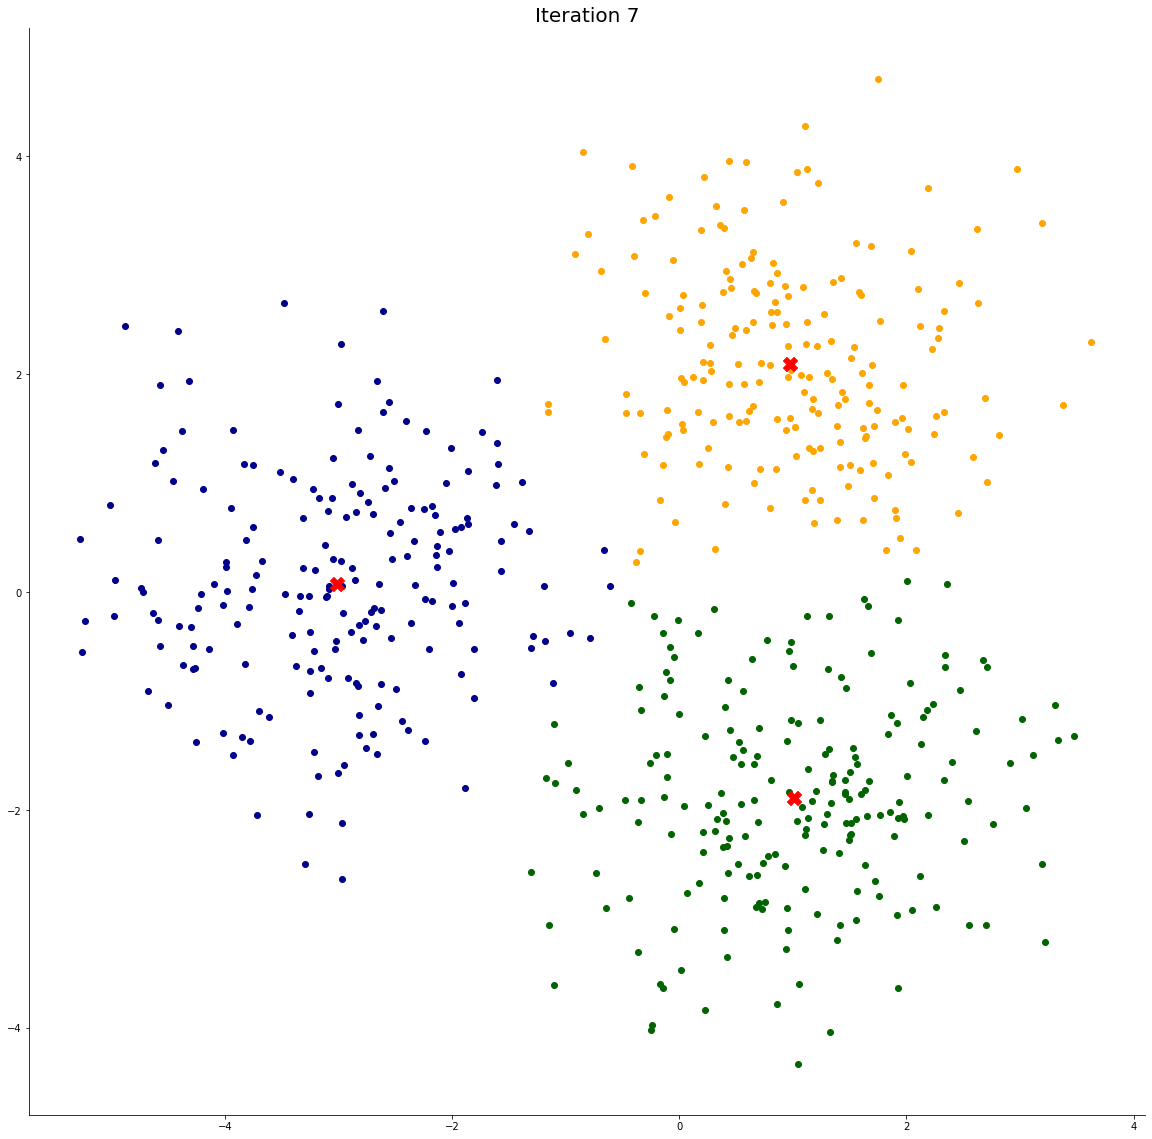

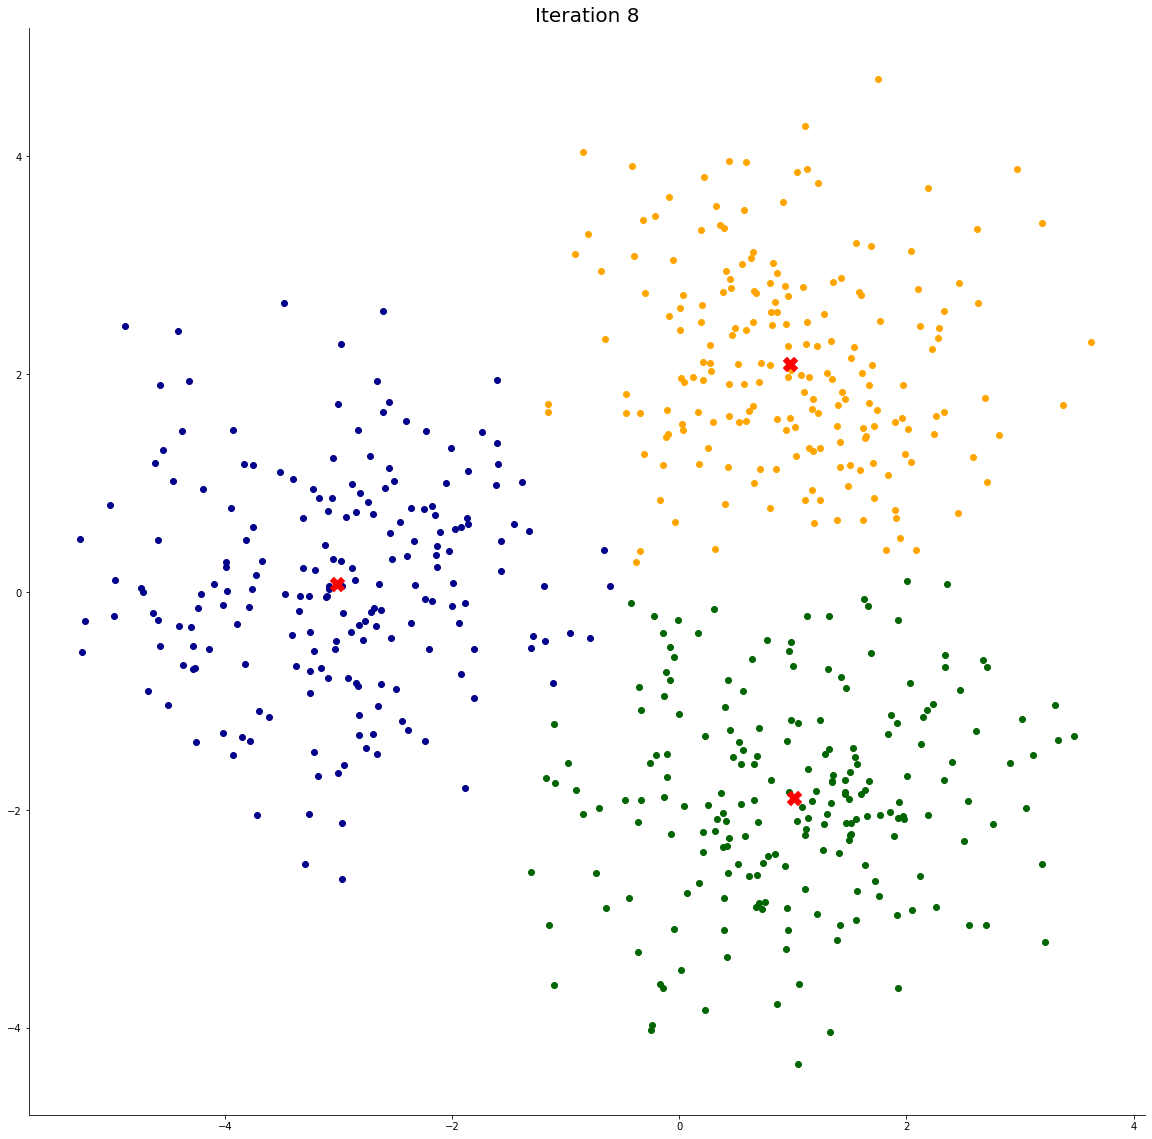

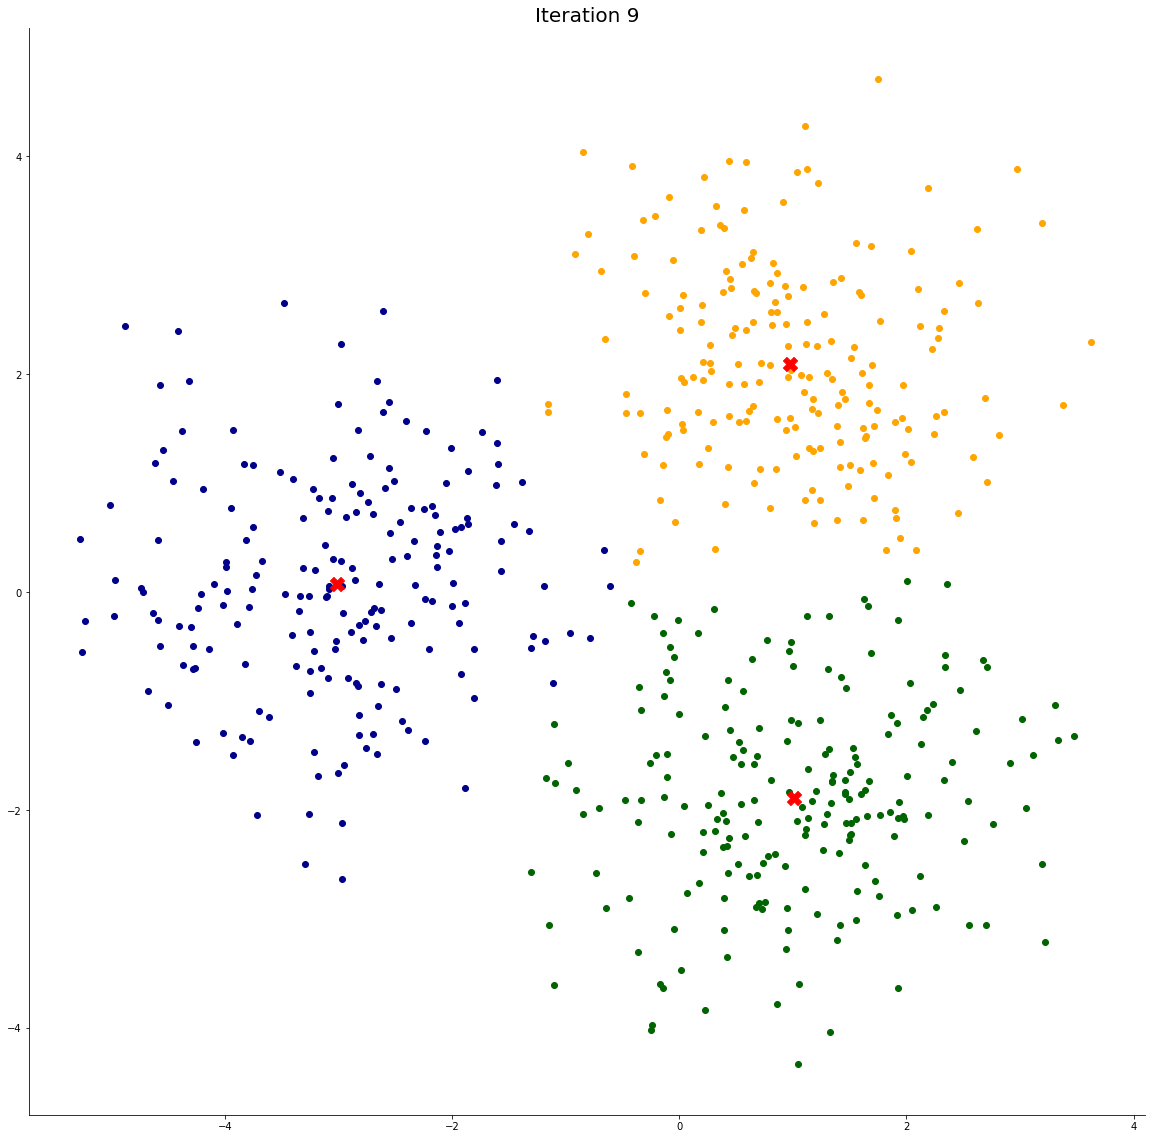

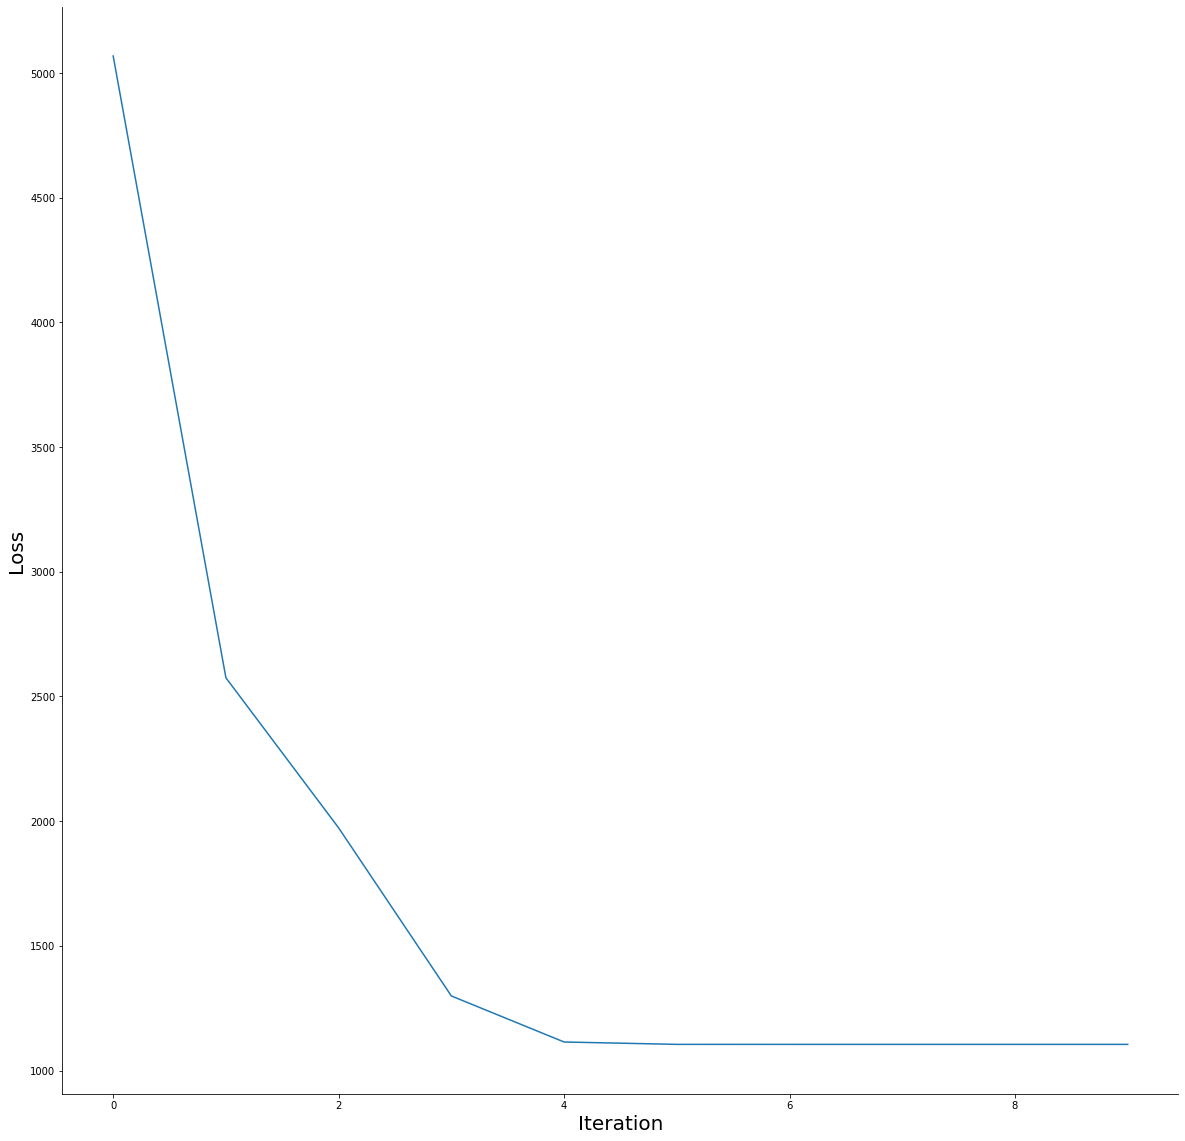

In [5]:
K = 3
colors = ["darkblue", "darkgreen", "orange", "darkred", "deeppink"]
C = data[:,np.random.randint(3*N, size=(K,))]
n_iter = 10
loss = np.zeros(n_iter)
for i in range(n_iter):
    # Get the closest mean for each data point
    dist = np.sum((C[:,:,None] - data[:,None])**2, 0) # Explain as it is a little bit messy
    M = dist.argmin(0)
    loss[i] = np.sum(dist.min(0))
    # Visualize
    for k in range(K):
        plt.scatter(data[0,M==k], data[1,M==k], color=colors[k])
        plt.scatter(C[0,k], C[1,k], s=200, color="red", marker="X")        
    plt.title(f"Iteration {i}", fontsize=20)
    sns.despine()
    plt.show()
    # Compute the new center
    for k in range(K):
        C[:,k] = np.mean(data[:, M == k], 1)

# Plot the loss function
plt.plot(loss)
plt.ylabel("Loss", fontsize=20)
plt.xlabel("Iteration", fontsize=20)
sns.despine()

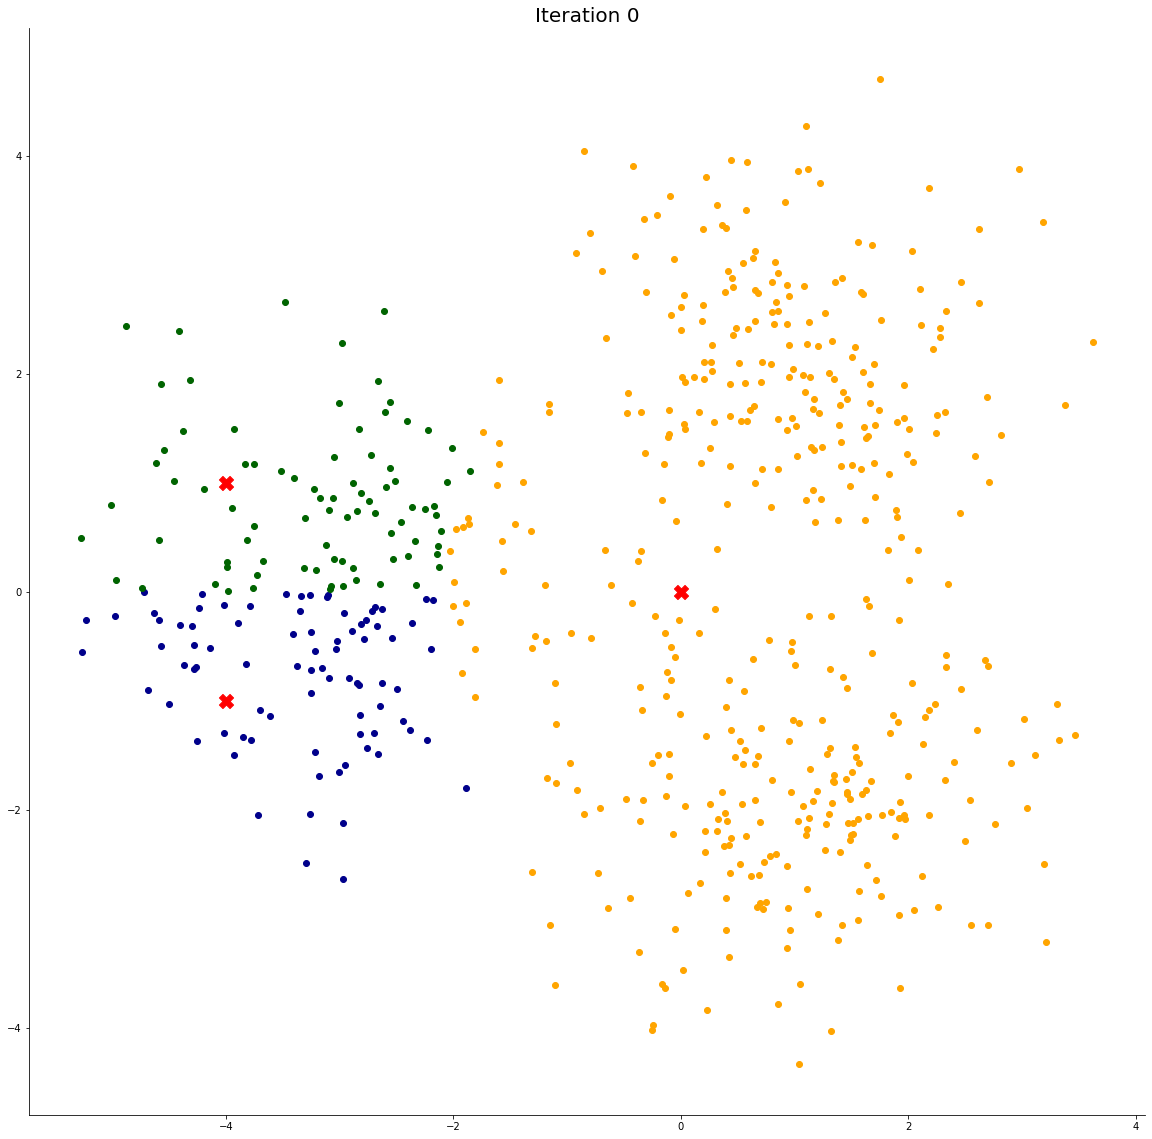

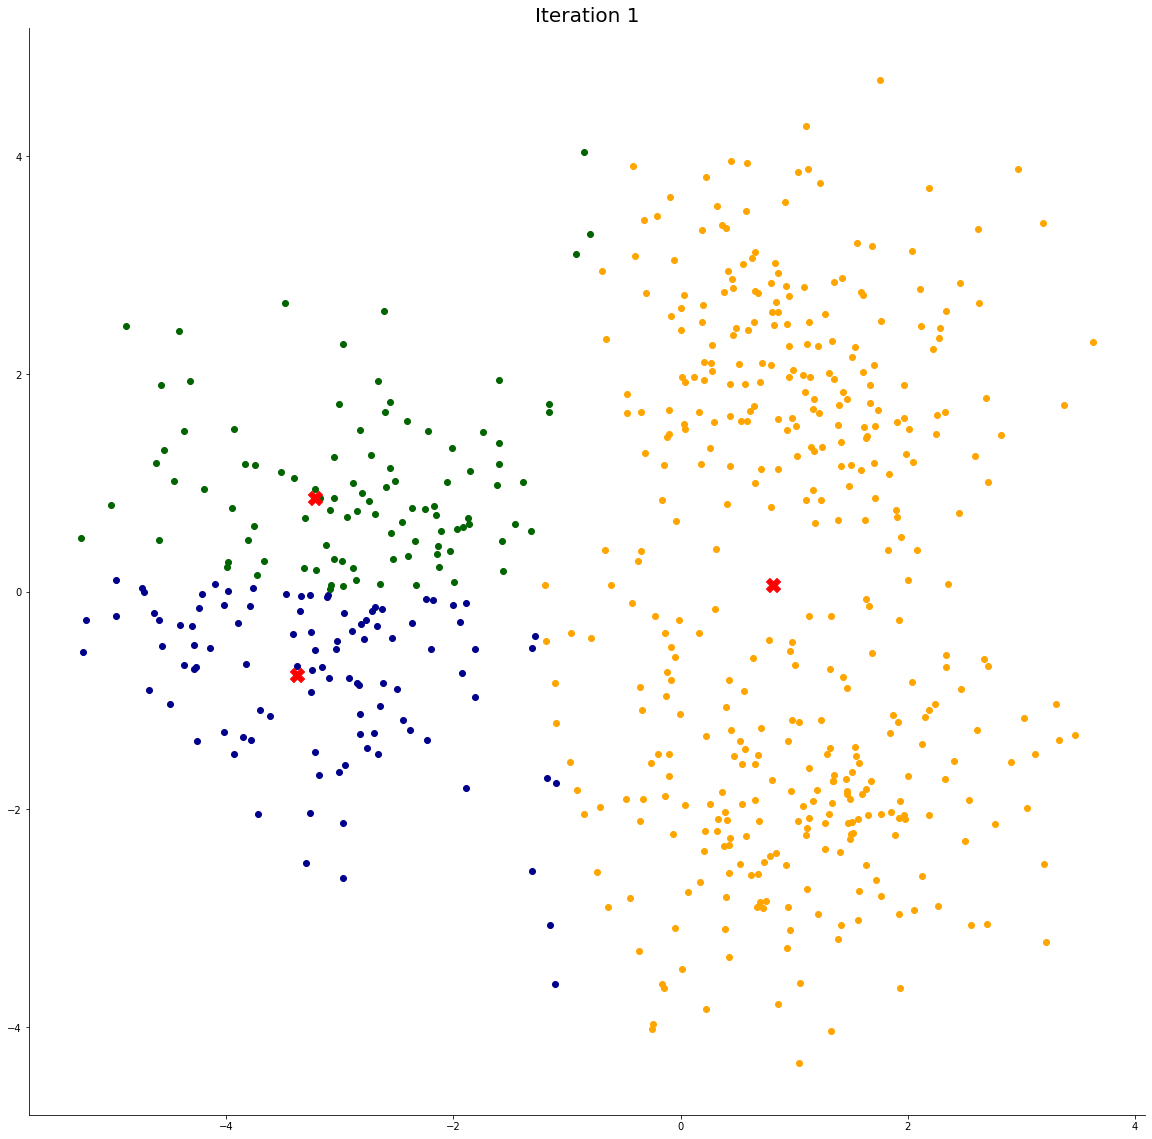

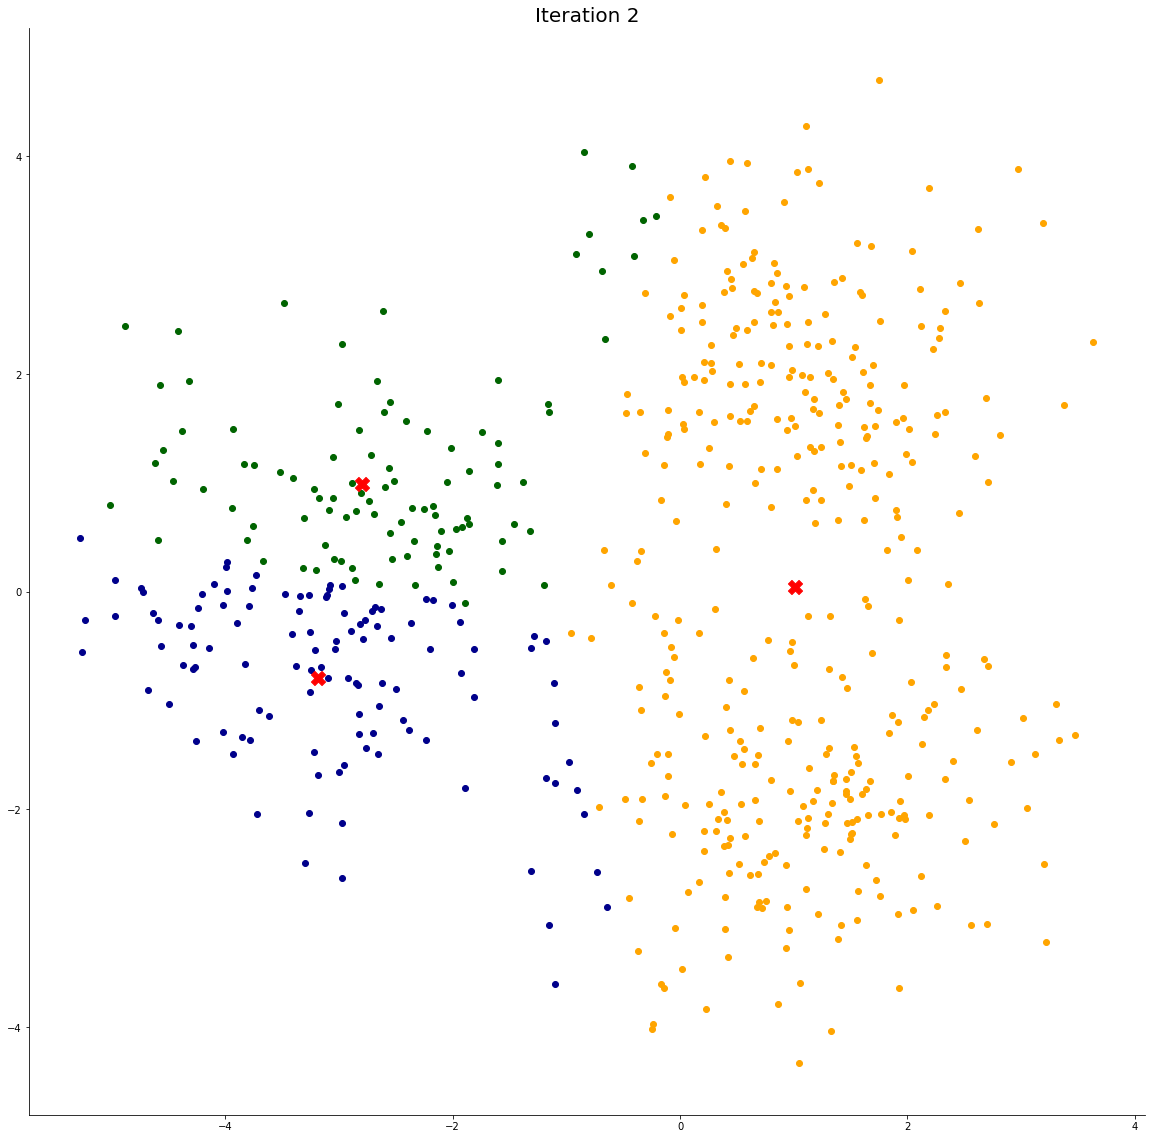

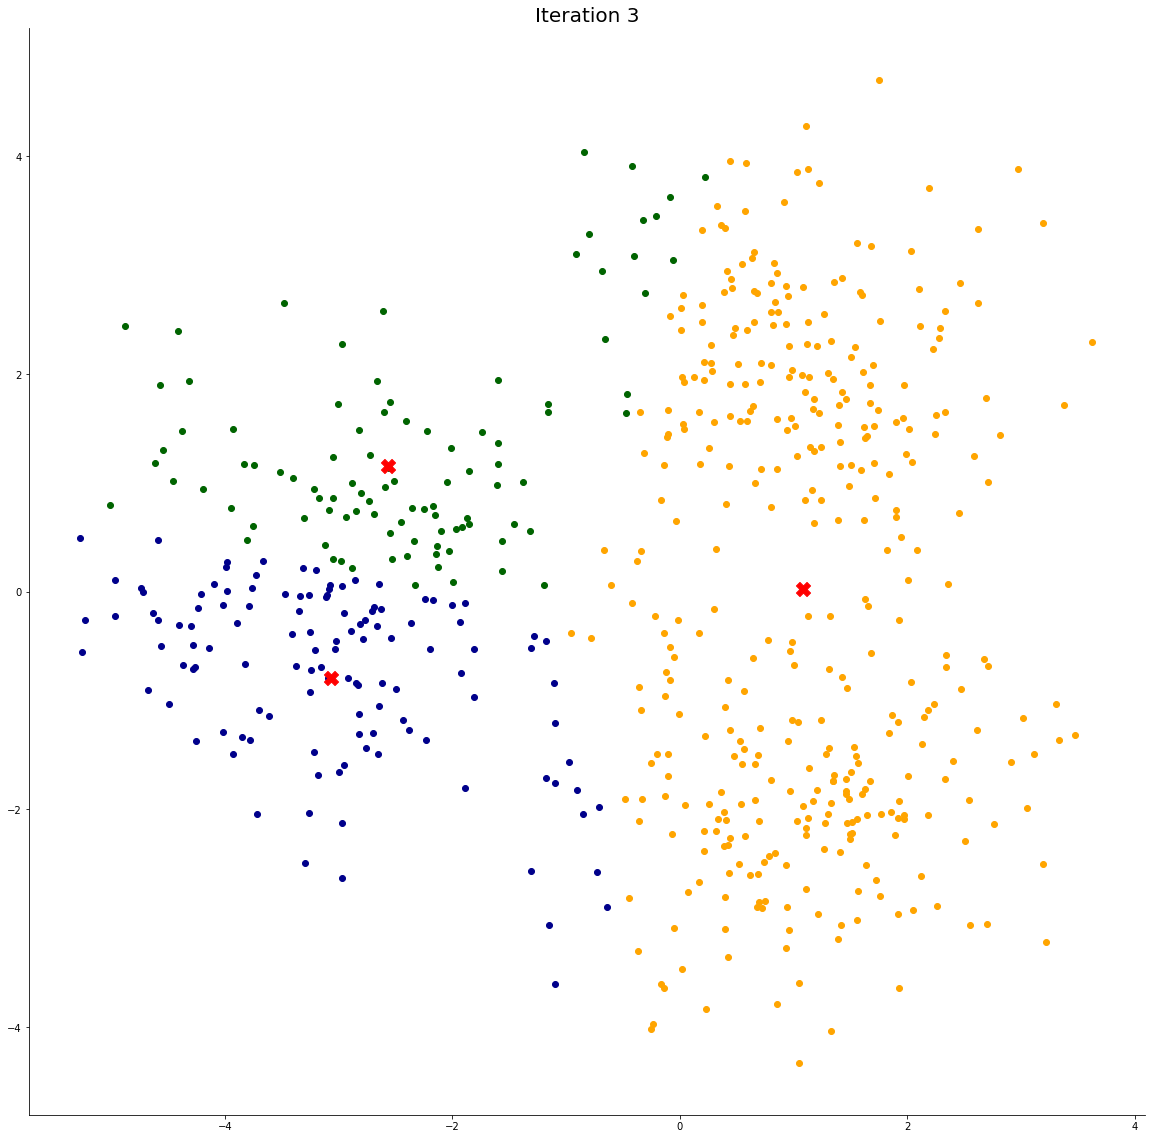

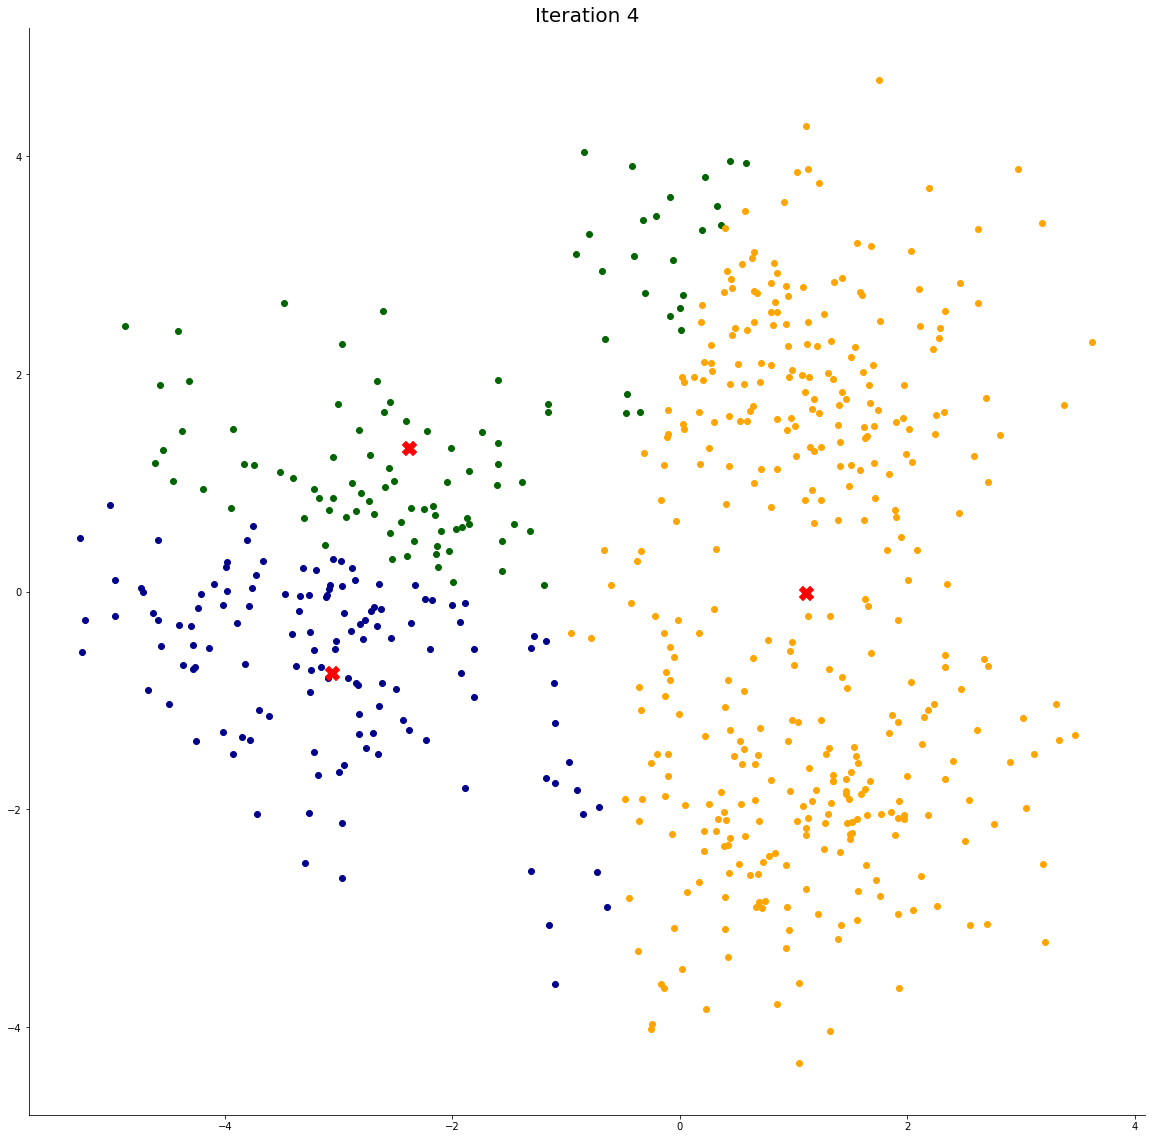

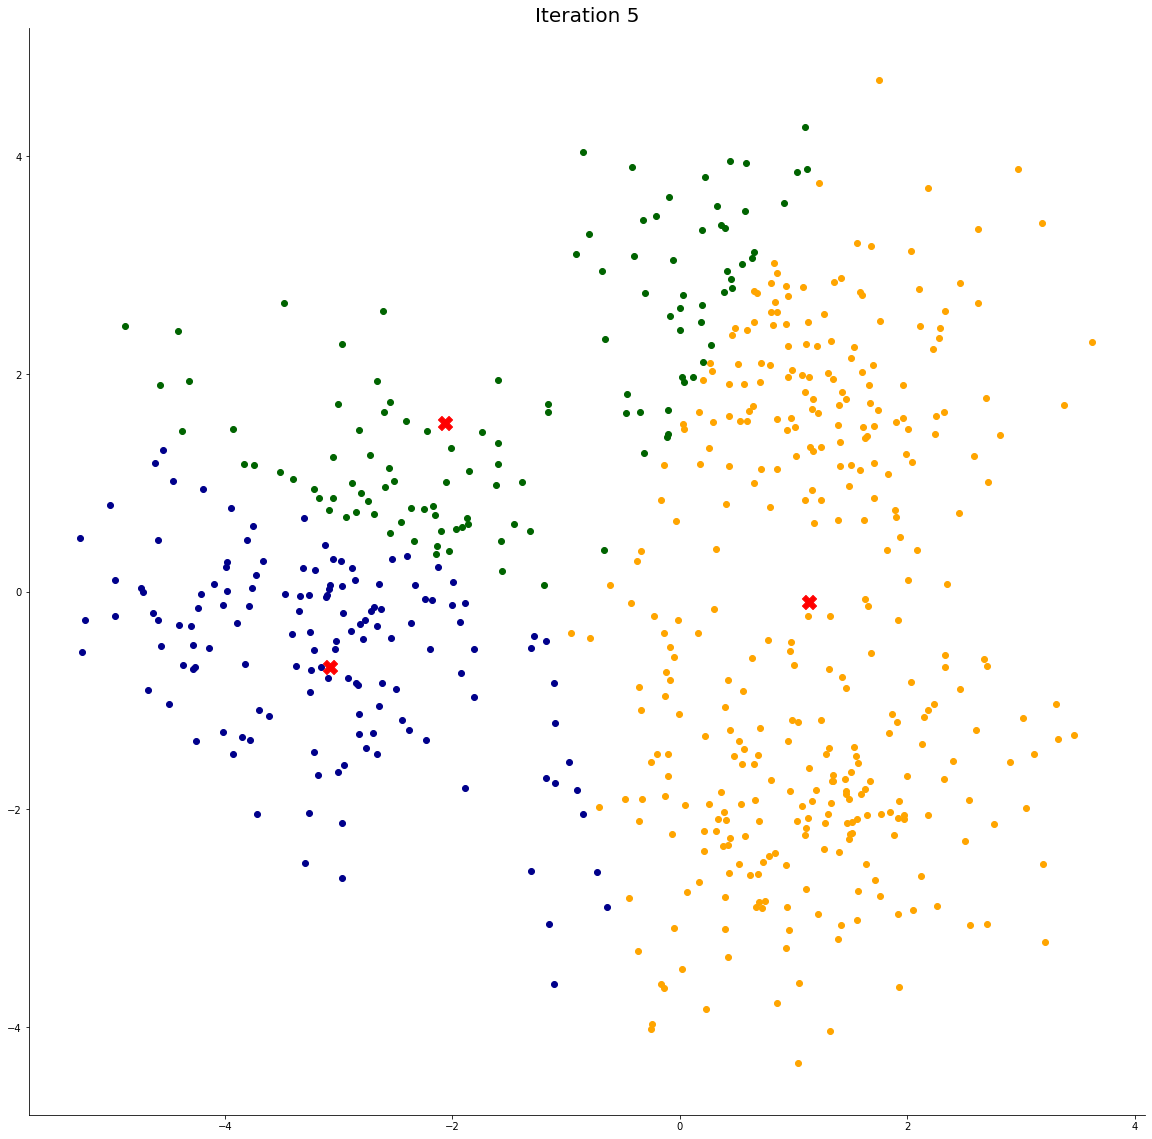

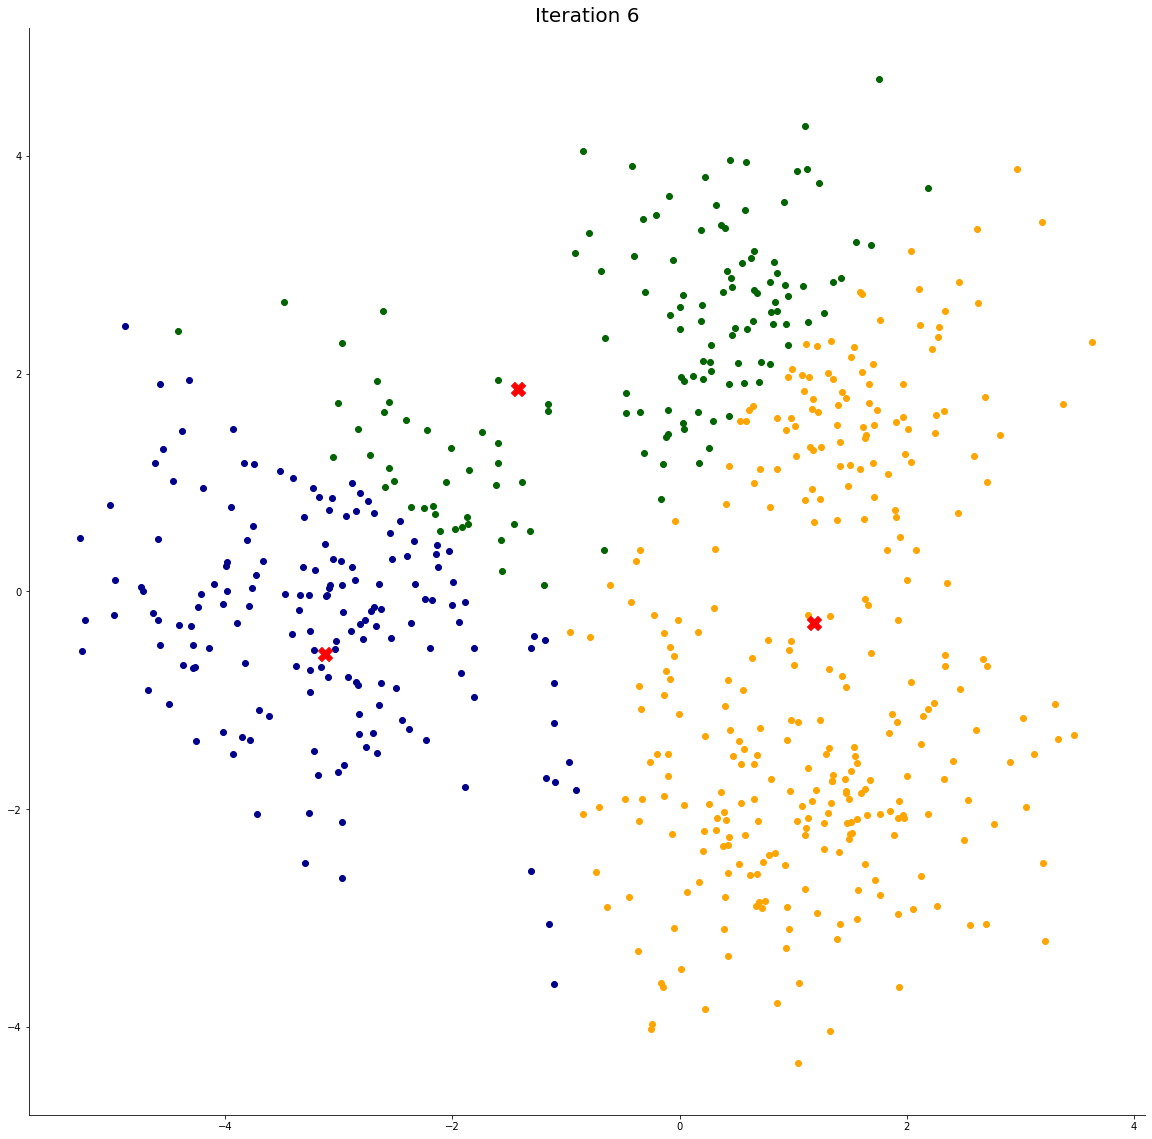

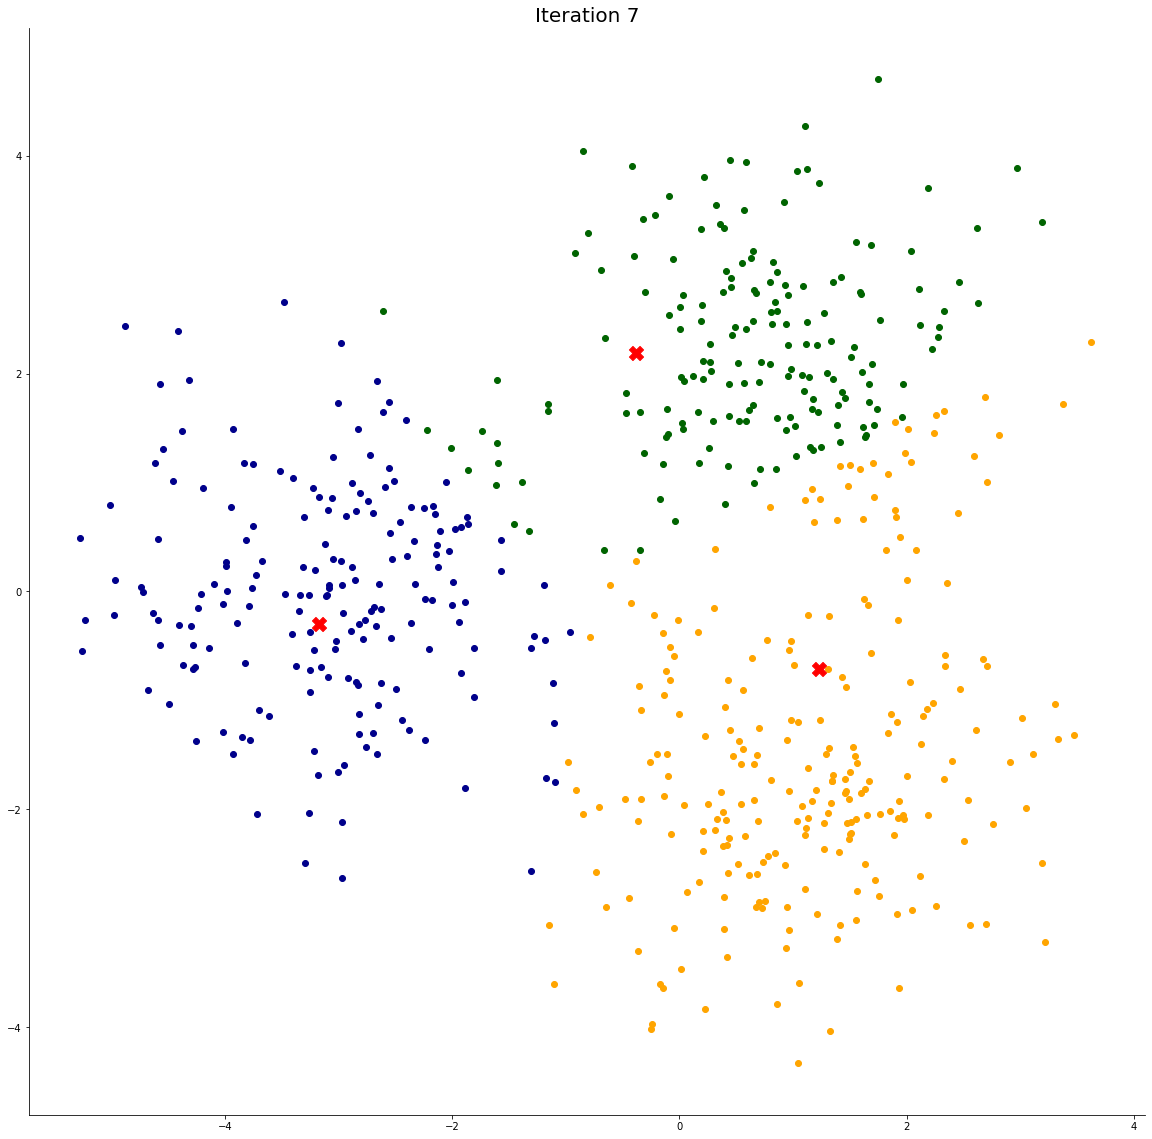

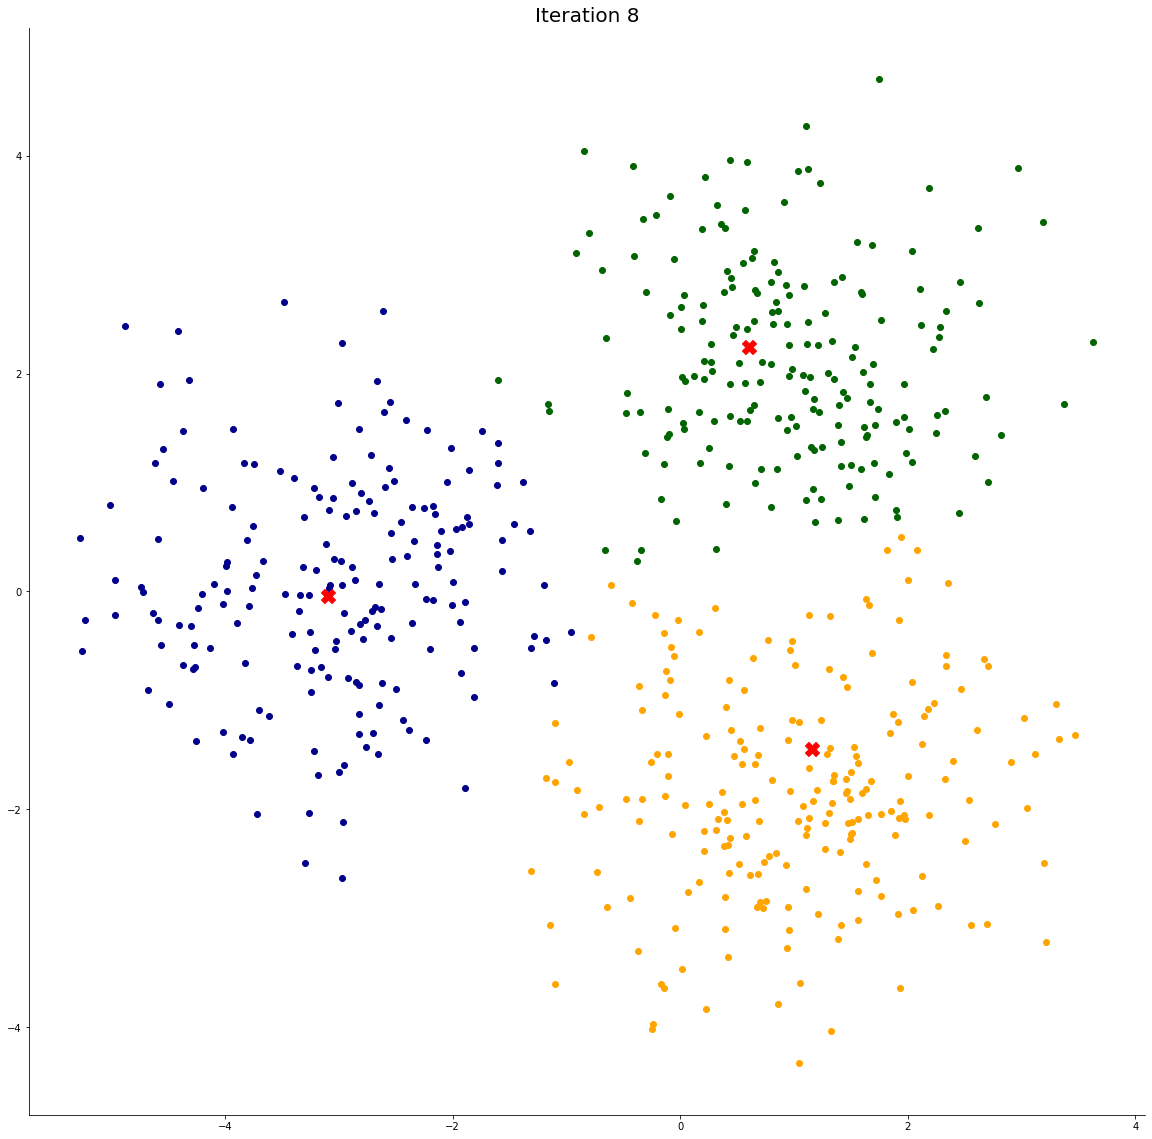

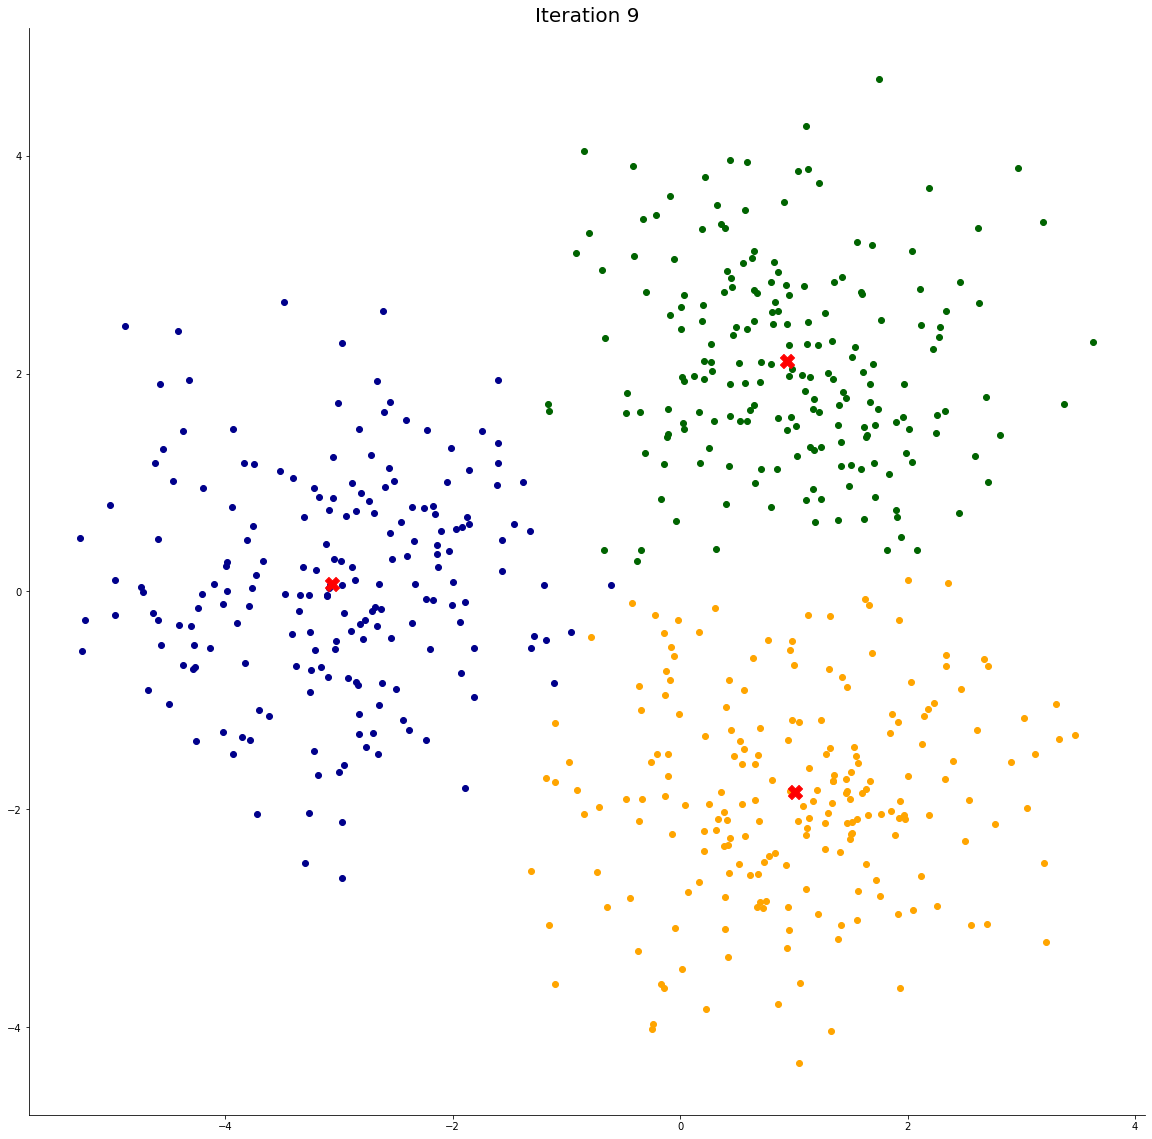

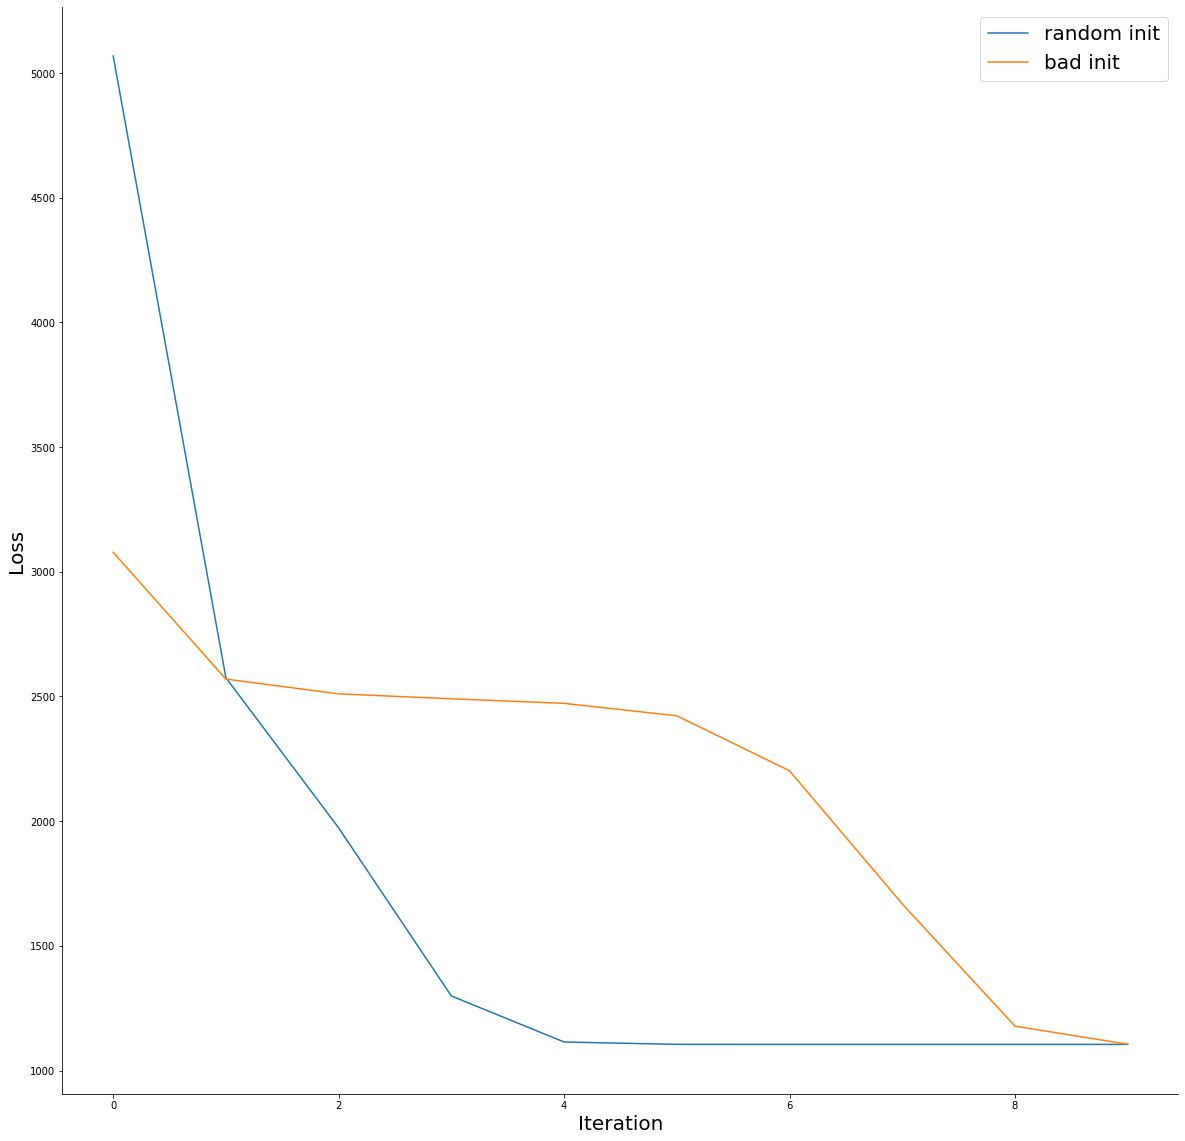

In [6]:
# What happens with a bad init?
K = 3
colors = ["darkblue", "darkgreen", "orange", "darkred", "deeppink"]
C = 1. * np.array([[-4.,-4.,0],[-1.,1.,0]])
n_iter = 10
loss2 = np.zeros(n_iter)
for i in range(n_iter):
    # Get the closest mean for each data point
    dist = np.sum((C[:,:,None] - data[:,None])**2, 0) # Explain as it is a little bit messy
    M = dist.argmin(0)
    loss2[i] = np.sum(dist.min(0))
    # Visualize
    for k in range(K):
        plt.scatter(data[0,M==k], data[1,M==k], color=colors[k])
        plt.scatter(C[0,k], C[1,k], s=200, color="red", marker="X")        
    plt.title(f"Iteration {i}", fontsize=20)
    sns.despine()
    plt.show()
    # Compute the new center
    for k in range(K):
        C[:,k] = np.mean(data[:, M == k], 1)
plt.plot(loss, label="random init")
plt.plot(loss2, label="bad init")
plt.ylabel("Loss", fontsize=20)
plt.xlabel("Iteration", fontsize=20)
plt.legend(fontsize=20)
sns.despine()

# 2 (Bonus) K-Nearest Neighbors
### (b) Implementation

In [7]:
# data = np.hstack([np.array([0, 1]).reshape(2,-1) + np.random.randn(2, N),
#                   np.array([0,-1]).reshape(2, -1) + np.random.randn(2, N)])
# np.save("knn2d.npy", data)
data = np.load("knn2d.npy")
labels = np.concatenate([np.zeros(N), np.ones(N)])
np.save("knn2dlabels.npy", labels)
xseq = np.arange(np.min(data[0])-0.1, np.max(data[0])+0.1, 0.05)
yseq = np.arange(np.min(data[1])-0.1, np.max(data[1])+0.1, 0.05)
xgrid, ygrid = np.meshgrid(xseq, yseq)
test_points = np.vstack([xgrid.reshape(1,-1), ygrid.reshape(1,-1)])
print(test_points.shape)

(2, 20502)


(-3.5106538593827215, 4.118833982208452)

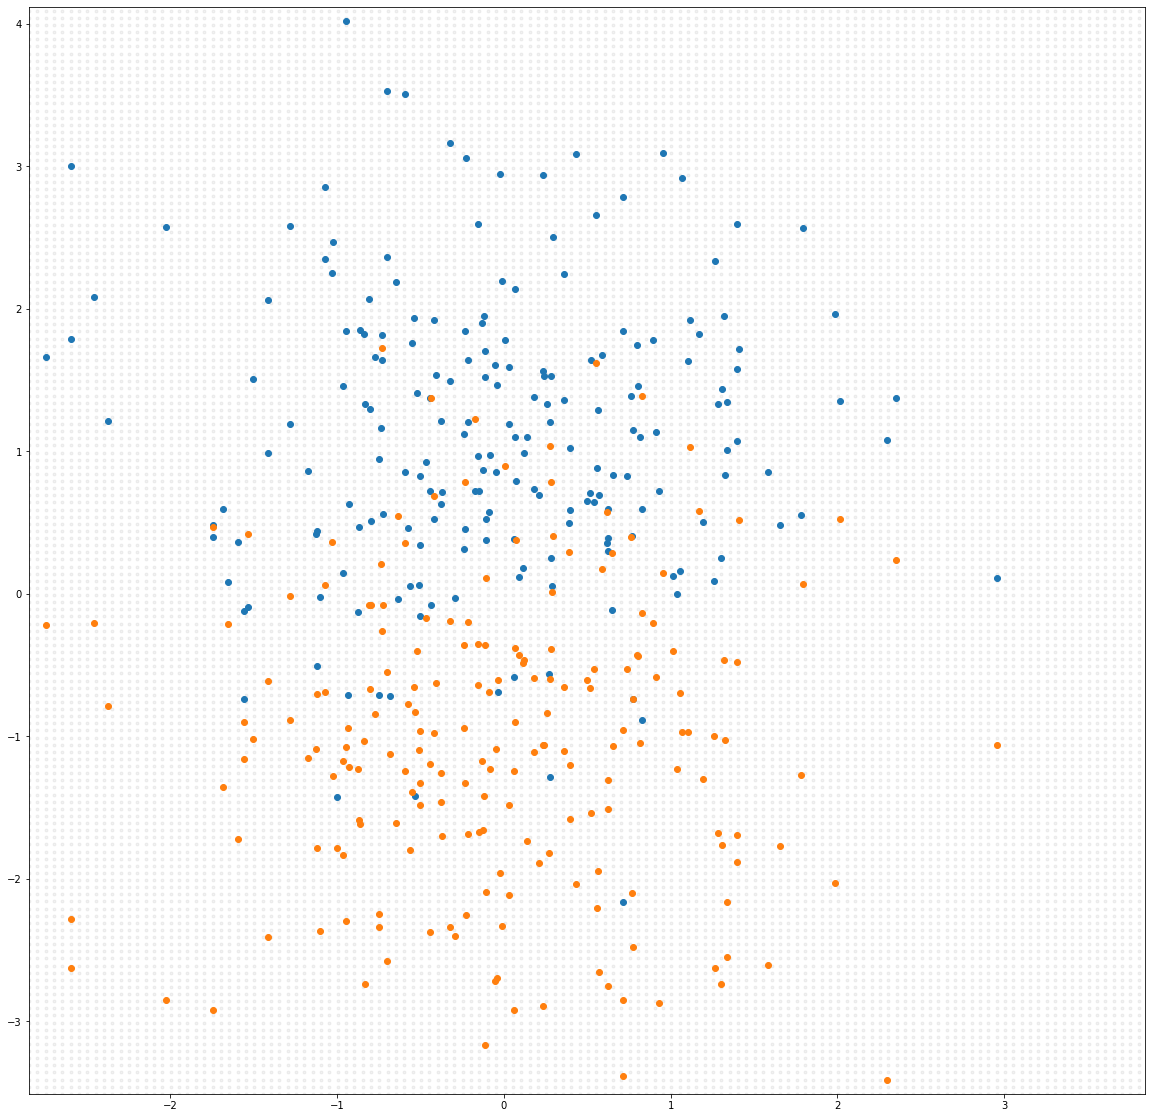

In [8]:
plt.scatter(test_points[0,:], test_points[1,:], color="gray", marker=".", alpha=0.1)
plt.scatter(data[0,labels==0], data[1,labels==0])
plt.scatter(data[0,labels==0], data[1,labels==1])
plt.xlim(np.min(data[0])-0.1, np.max(data[0])+0.1)
plt.ylim(np.min(data[1])-0.1, np.max(data[1])+0.1)

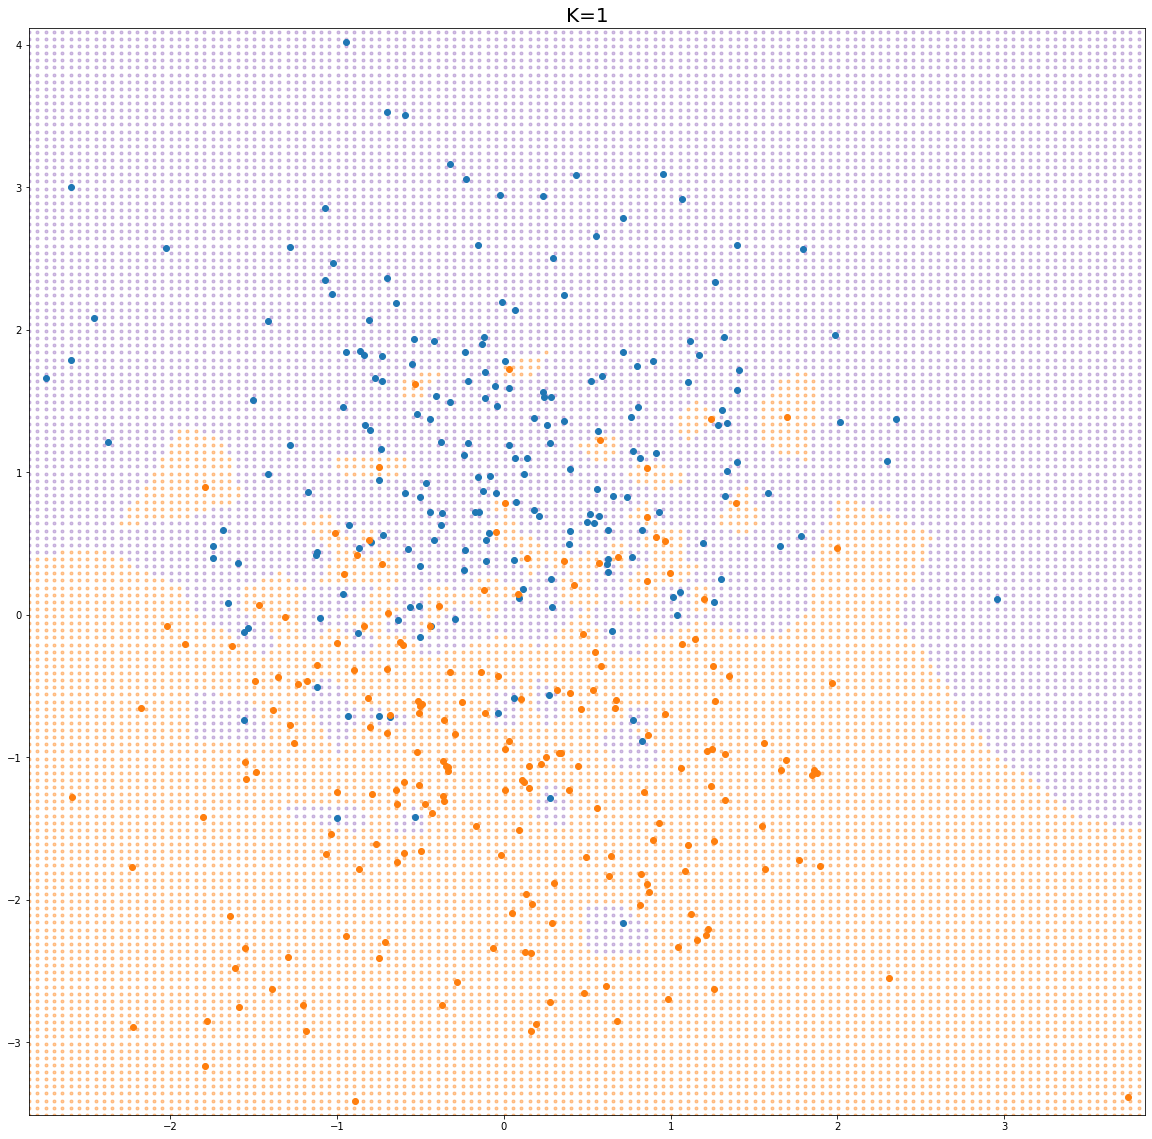

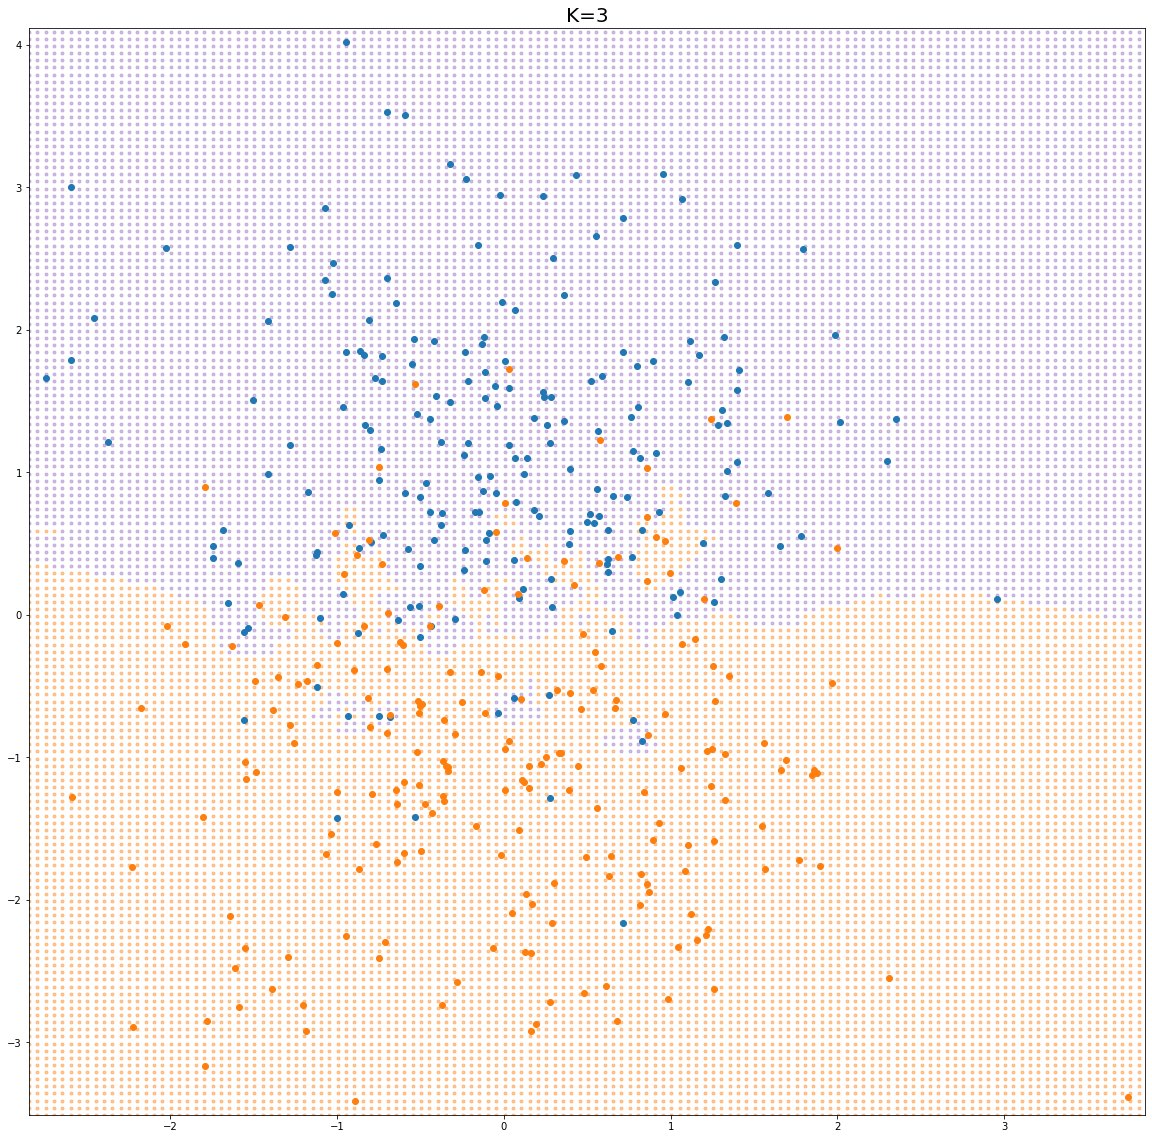

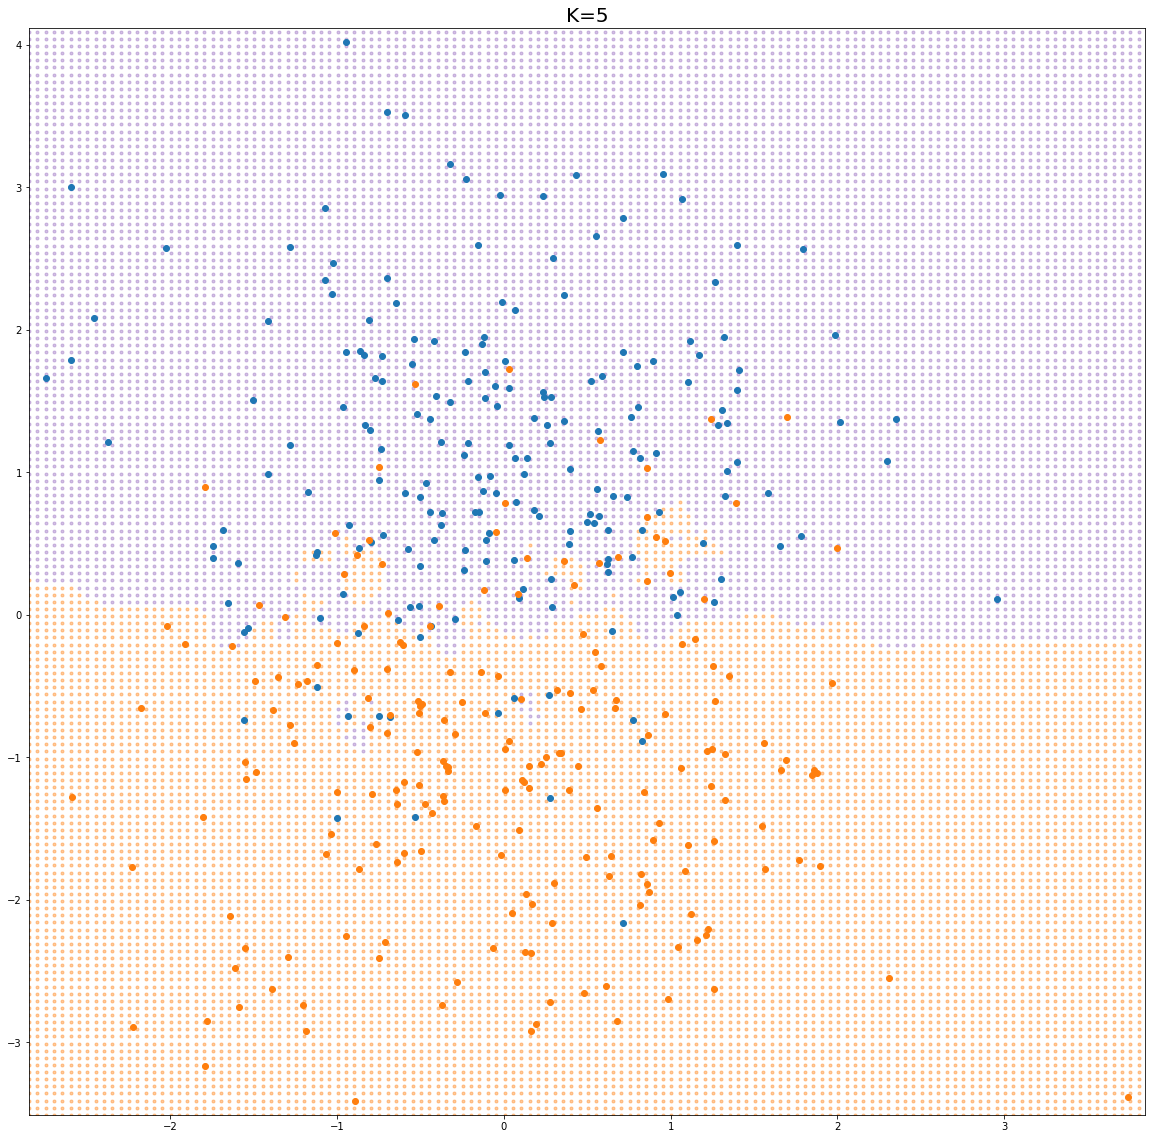

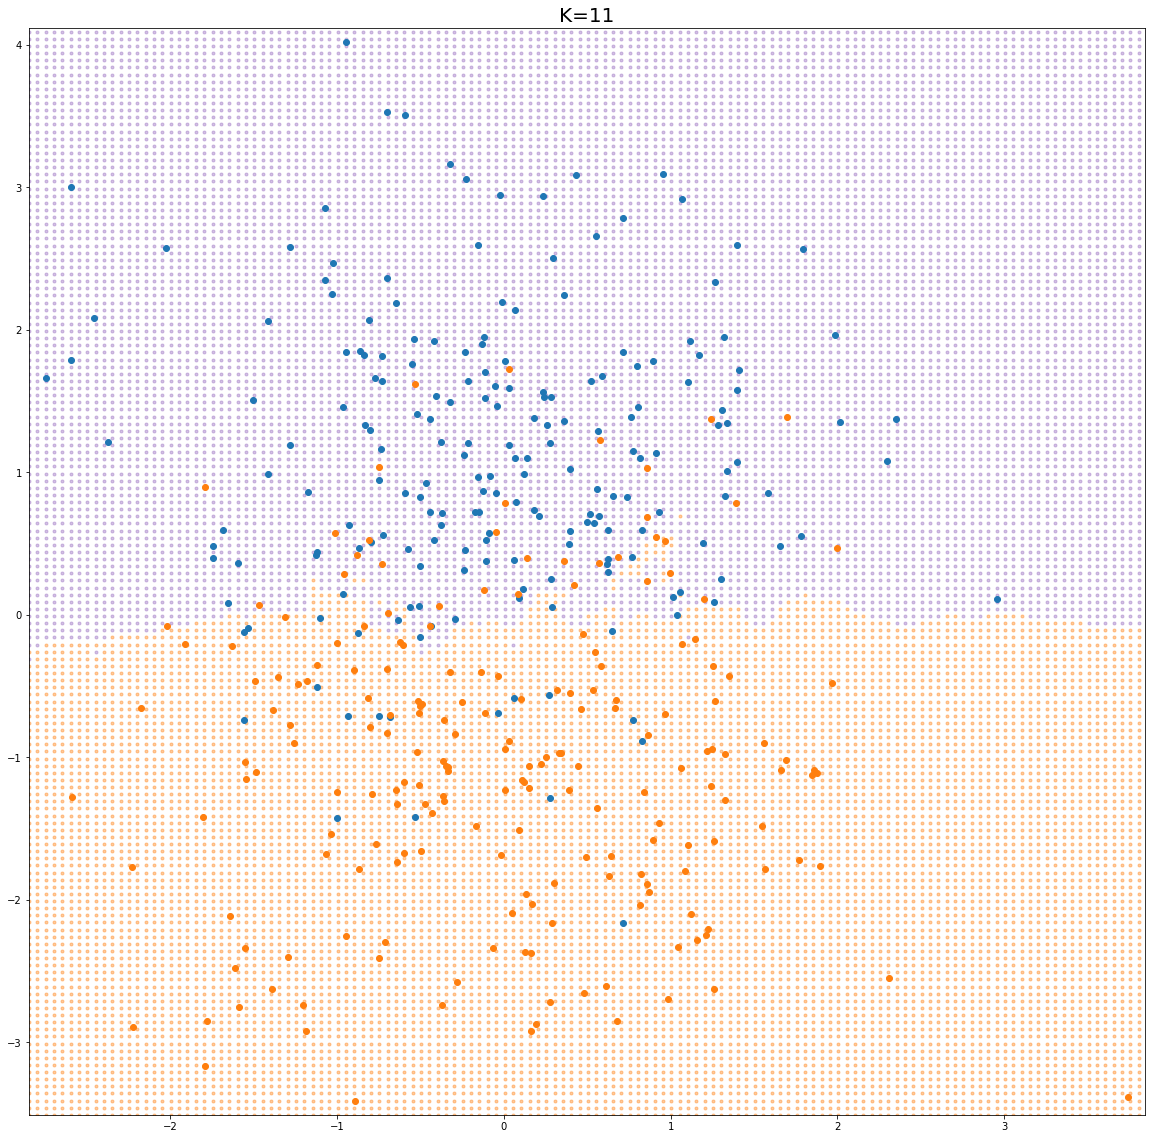

In [ ]:
dist = np.sum((data[:,:,None] - test_points[:,None])**2, 0)
for K in [1,3,5,11,21,51]:   
    pred = labels[dist.argsort(0)[:K]].mean(0)
    plt.scatter(test_points[0,pred < 0.5], test_points[1,pred < 0.5], marker=".", color=sns.color_palette()[4], alpha=0.4)
    plt.scatter(test_points[0,pred > 0.5], test_points[1,pred > 0.5], marker=".", color=sns.color_palette()[1], alpha=0.4)
    plt.scatter(data[0,labels==0], data[1,labels==0], color=sns.color_palette()[0])
    plt.scatter(data[0,labels==1], data[1,labels==1], color=sns.color_palette()[1])
    plt.xlim(np.min(data[0])-0.1, np.max(data[0])+0.1)
    plt.ylim(np.min(data[1])-0.1, np.max(data[1])+0.1)
    plt.title(f"K={K}", fontsize=20)
    plt.show()

#### (b) Cross-Validation

In [24]:
def run_cv(data, labels, folds=5, K=1, vis=False):
    N = data.shape[1]
    assert N % folds == 0, "Please come up with a proper splitting"
    size_fold = int(N / folds)
    permute = np.random.permutation(N)
    perm_data = data[:,permute]
    perm_label = labels[permute]
    cv_data = [(perm_data[:,(size_fold*c):(size_fold*(c+1))], perm_label[(size_fold*c):(size_fold*(c+1))]) for c in range(folds)]
#     print("Average in each split:", [np.mean(cv_data[i][1]) for i in range(5)])
    avg_acc = np.zeros(folds)
    for c in range(folds):

        train_data = np.hstack([cv_data[i][0] for i in range(folds) if i != c])
        train_label = np.concatenate([cv_data[i][1] for i in range(folds) if i != c])
        test_data, test_label = cv_data[c]
        if K == 0:
            pred = np.mean(train_label) > 0.5
        else:
            dist = np.sum((train_data[:,:,None] - test_data[:,None])**2, 0)
            pred = train_label[dist.argsort(0)[:K]].mean(0) > 0.5
        avg_acc[c] = np.mean(pred == test_label)
        if vis:
            plt.scatter(train_data[0,train_label==0], train_data[1,train_label==0], color=sns.color_palette()[0])
            plt.scatter(train_data[0,train_label==1], train_data[1,train_label==1], color=sns.color_palette()[1])
            plt.show()
    return avg_acc

Text(0.5, 0, 'Nr of Neighbors')

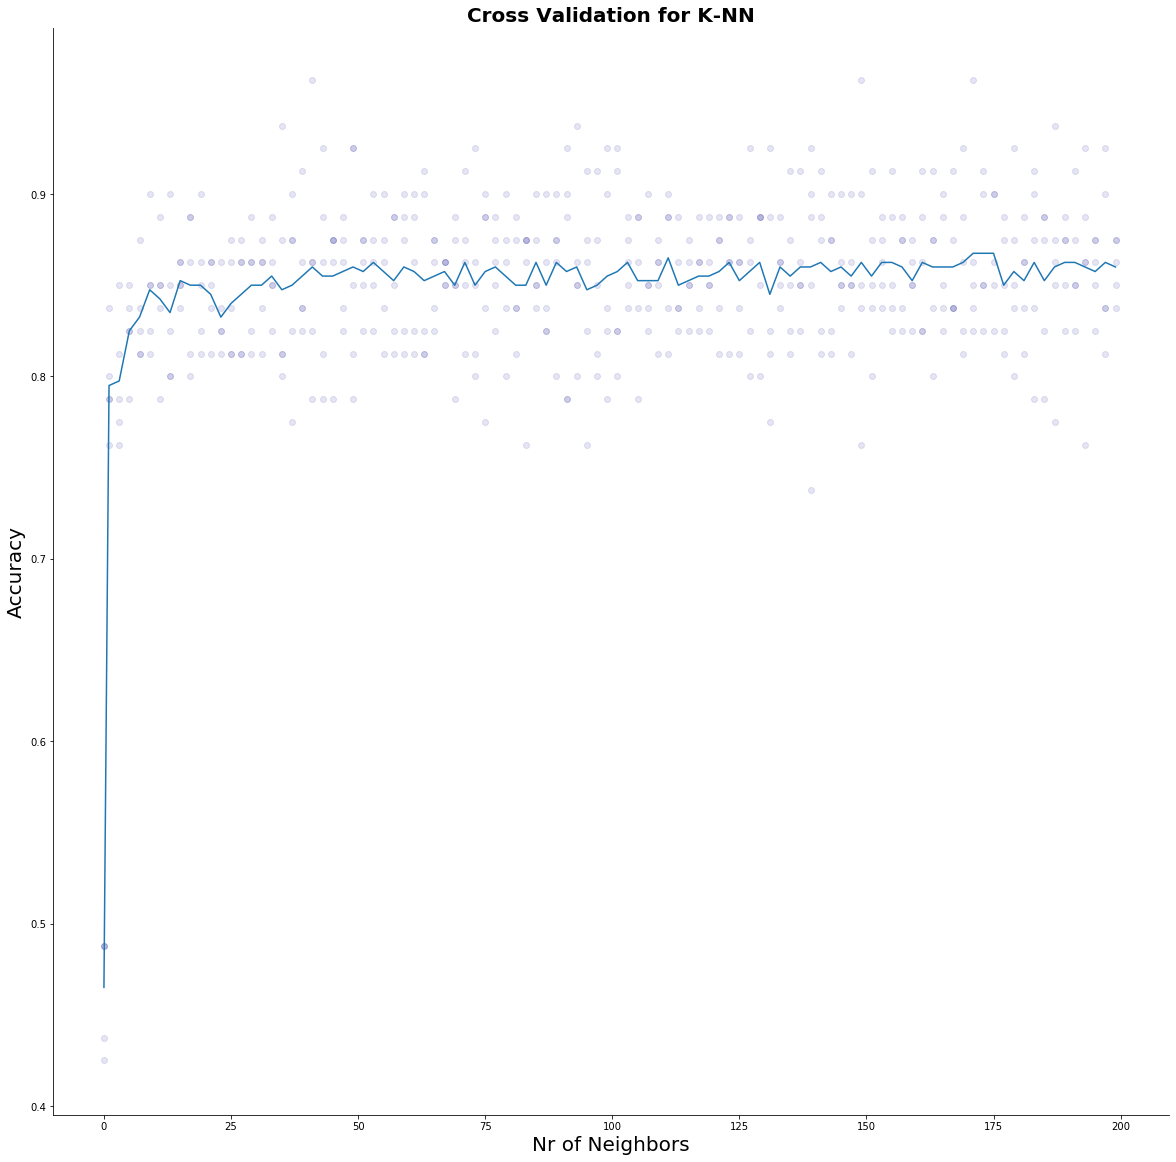

In [25]:
folds = 5
acc = run_cv(data, labels, folds, K=0)
overall = [np.mean(acc),]
plt.scatter(np.zeros(len(acc)), acc, color="darkblue", alpha=0.1)
for K in np.arange(1, 201, 2):
    acc = run_cv(data, labels, folds, K)
    plt.scatter(K*np.ones(len(acc)), acc, color="darkblue", alpha=0.1)
    overall.append(np.mean(acc))
plt.plot(np.hstack([np.zeros(1), np.arange(1, 201, 2)]), overall)
sns.despine()
plt.title("Cross Validation for K-NN", fontsize=20, fontweight="bold")
plt.ylabel("Accuracy", fontsize=20)
plt.xlabel("Nr of Neighbors", fontsize=20)